## Материалы:
Презентация: <https://drive.google.com/file/d/1rCpju2-orVyyc4f7_DR909lzIrgx63o2/view?usp=sharing>

Дашборд: <https://public.tableau.com/views/_16921320864370/Dashboard1?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link>

## Задача:
Проанализировать клиентов регионального банка и выделите сегменты клиентов, которые склонны уходить из банка.

Провести исследовательский анализ данных, определить все значимые признаки отточности (интервалы значений характеристик, которые связаны с повышенным оттоком, сравните портреты типичных клиентов, которые склонны и не склонныуходить из банка и т.д)

Сформулировать и проверить статистические гипотезы.
Проверить гипотезу различия дохода между теми клиентами, которые ушли и теми, которые остались.

Сформулировать и проверить статистическую гипотезу относительно представленных данных, которая поможет внести ясность в исследование.

Объединяя признаки отточности, сформировать сегменты, отберать из них лучшие и дайть по ним рекомендации

### Шаги:

**1. Загрузка данных и подготовка к исследованию**
- Преобразование данных в нужные типы
- Замена названия столбцов
- Проверка на пропуски 
- Проверка на дубликаты 
- Проверка на наличие выбросов

**2.Исследовательский анализ данных:**
- Корреляционный анализ
- Сравнение портретов типичных клиентов склонных к уходу(средние и медианы)
- Оценить значимость влияния на отток среди тех клиентов, которые остались и которые ушли 
- Построить нормированные гистограммы по непрерывным переменным в разрезе оттока
- Построить графики с уровнями оттока по категориям

**3. Проверка статистических гипотез**
- Проверить гипотезу различия дохода между теми клиентами, которые ушли и теми, которые остались.
- Выдвижение второй гипотезы и ее проверка
- Формулирование промежуточных выводов на основе статистического анализа

**4. Сегментация на основе стратегических показателей**

**5. Выводы и рекомендации для заказчика**

### Импорт библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

### Загрузка данных

In [2]:
try:
    data = pd.read_csv('/Users/666/Documents/Data Analysis/Проекты/df/bank_scrooge.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/bank_scrooge.csv')

## Предобработка данных

### Изучение данных 

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


In [4]:
data.isna().sum()

USERID              0
score               0
city                0
gender              0
age                26
equity              0
balance          2295
products            0
credit_card         0
last_activity       0
EST_SALARY          0
churn               0
dtype: int64

Есть пропуски в столбцах с возрастом и балансом

In [5]:
data=data.dropna(subset=['age'])

In [6]:
data[data['balance'].isna()]['churn'].value_counts(normalize=True)*100

0    99.429574
1     0.570426
Name: churn, dtype: float64

Большинство пропусков среди оставшихся клиентов, природу пропусков определить нельзя поэтом оставляем пропуски

Предлагаю пропуски возраста удалить, а балансов оставить, так как средним или медианой их не заполнить

In [7]:
print('\nКоличество явных дубликатов =', data.duplicated().sum())
print('\nКоличество неявных дубликатов =', data.duplicated(subset=['USERID'], keep=False).sum())


Количество явных дубликатов = 0

Количество неявных дубликатов = 100


In [8]:
data = data.drop_duplicates(subset=['USERID'])

Удаляю неявные дубликаты

### Переименование столбцов и приведение к корректному типу

In [9]:
data = data.rename(columns={'USERID' : 'user_id', 'EST_SALARY' : 'est_salary'})
data.columns = data.columns.str.lower()
data['score'] = data['score'].astype(int)
data['age'] = data['age'].astype(int)

### Кодирование столбцов

Для того что-бы в дальнейшем использовать столбцы с городом и полом необходимо присвоить им численные значения

In [10]:
data['city_num']=data['city']
data['gender_num']=data['gender']
data = pd.get_dummies(data, columns = ['city_num', 'gender_num'])
data = data.rename(
    columns={
        'city_num_Ростов' : 'Ростов', 'city_num_Рыбинск' : 'Рыбинск', 'city_num_Ярославль' : 'Ярославль',
        'gender_num_Ж' : 'Женщина', 'gender_num_М' : 'Мужчина'
    })

In [11]:
display(data)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль,Женщина,Мужчина
0,183012,850,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1,0,1,0,1,0
1,146556,861,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0,0,1,0,1,0
2,120722,892,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0,0,1,0,1,0
3,225363,866,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1,0,0,1,1,0
4,157978,730,Ярославль,М,34,5,174.00,1,1,0,67353.16,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814,Рыбинск,М,27,1,78144.65,1,0,1,18943.64,0,0,1,0,0,1
9996,139170,894,Ярославль,М,46,0,NaN,1,1,0,196898.29,0,0,0,1,0,1
9997,115639,903,Ярославль,М,24,0,NaN,2,1,1,108905.09,0,0,0,1,0,1
9998,148700,777,Ярославль,Ж,68,3,865457.97,3,0,1,86874.90,0,0,0,1,1,0


В ходе предобработки данных были удалены неявные дубликаты и пропуски, переименованы столбцы и изменен тип данных, а так же закодированы столбцы для удобства дальнейшего анализа

In [1]:
data.products.min()

NameError: name 'data' is not defined

In [13]:
data = data.loc[data['products']>0]

## Исследовательский анализ

### Корреляционная матрица

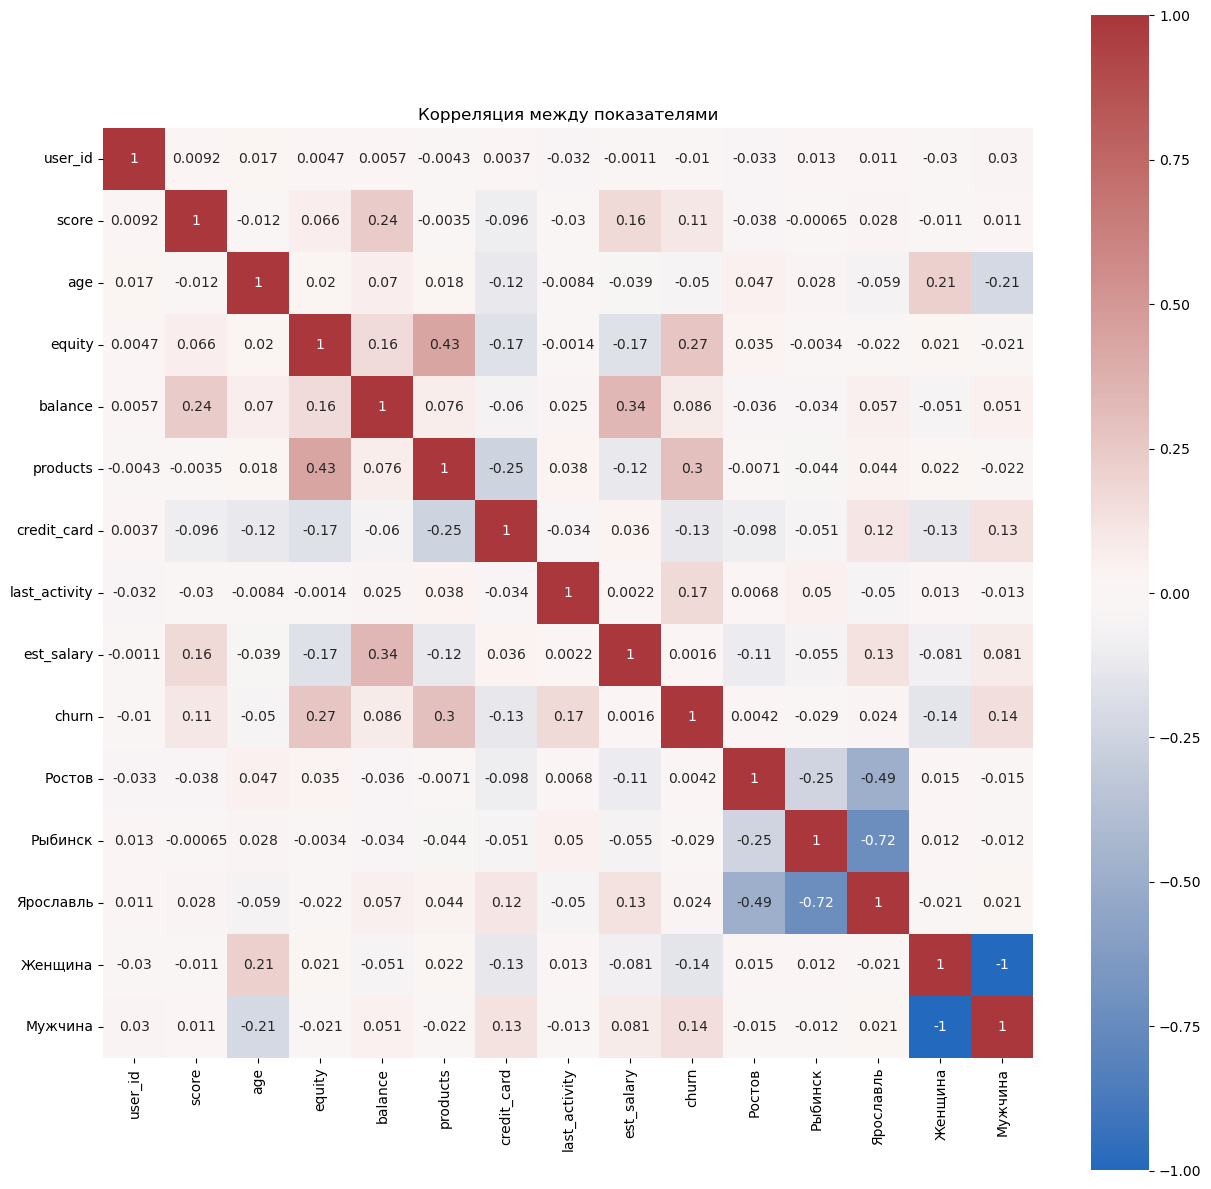

In [14]:
correlation = data.corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='vlag')
plt.title('Корреляция между показателями')
plt.show()

Столбец churn имеет наибольшую корреляцию по модулю со следующими столбцами: 
- products (слабая связь 0.3)
- equity (слабая связь 0.27)
- last_activity (слабая связь 0.17)
- мужчина (слабая связь 0.14)
- score (слабая связь 0.11)
- женщина (слабая связь -0.14)
- credit_card (слабая связь -0.13)

### Сравнение портретов типичных клиентов склонных к уход

In [15]:
def ratio(df):
    if df.stayed == 0 or df.left == 0:
        return 0
    if df.stayed > df.left:
        return (df.stayed / df.left - 1) * 100
    else:
        return (df.left / df.stayed - 1) * 100
    
data_comparison = (data.drop('user_id', axis=1)
                   .groupby('churn')
                   .mean()
                   .T
                   .sort_index()
                   .rename(columns={0:'stayed', 1:'left'})
                  )
data_comparison['%'] = data_comparison.apply(ratio, axis=1)

data_comparison_sorted = (data_comparison
                          .sort_values('%', ascending=False)
                         )
data_comparison_sorted

churn,stayed,left,%
equity,2.381246,3.763476e+00,58.046507
balance,733789.915097,1.134458e+06,54.602589
Женщина,0.532634,3.492849e-01,52.492745
last_activity,0.483282,7.024202e-01,45.343785
Мужчина,0.467366,6.507151e-01,39.230350
products,1.758421,2.377338e+00,35.197322
credit_card,0.708822,5.517052e-01,28.478353
Рыбинск,0.273535,2.398240e-01,14.056506
Ярославль,0.584454,6.144114e-01,5.125707
age,43.015793,4.142959e+01,3.828664


При сравнении по среднему наивысшее соотношение получили следующие показатели:
- equity
- balance
- Женщина
- last_activity
- Мужчина
- products
- credit_card

In [16]:
data_comparison = (data.drop('user_id', axis=1)
                   .groupby('churn')
                   .median()
                   .T
                   .sort_index()
                   .rename(columns={0:'stayed', 1:'left'})
                  )
data_comparison['%'] = data_comparison.apply(ratio, axis=1)

data_comparison_sorted = (data_comparison
                          .sort_values('%', ascending=False)
                         )
data_comparison_sorted

churn,stayed,left,%
balance,475382.445,783908.90,64.900683
equity,3.000,4.00,33.333333
est_salary,118247.250,125408.88,6.056488
age,40.000,39.00,2.564103
score,848.000,866.00,2.122642
credit_card,1.000,1.00,0.000000
last_activity,0.000,1.00,0.000000
products,2.000,2.00,0.000000
Женщина,1.000,0.00,0.000000
Мужчина,0.000,1.00,0.000000


При сравнении по медиане наивысшее соотношение получили следующие показатели:
- balance
- equity
- est_salary
- age
- score

### Влияние оценки собственности на уход клиентов

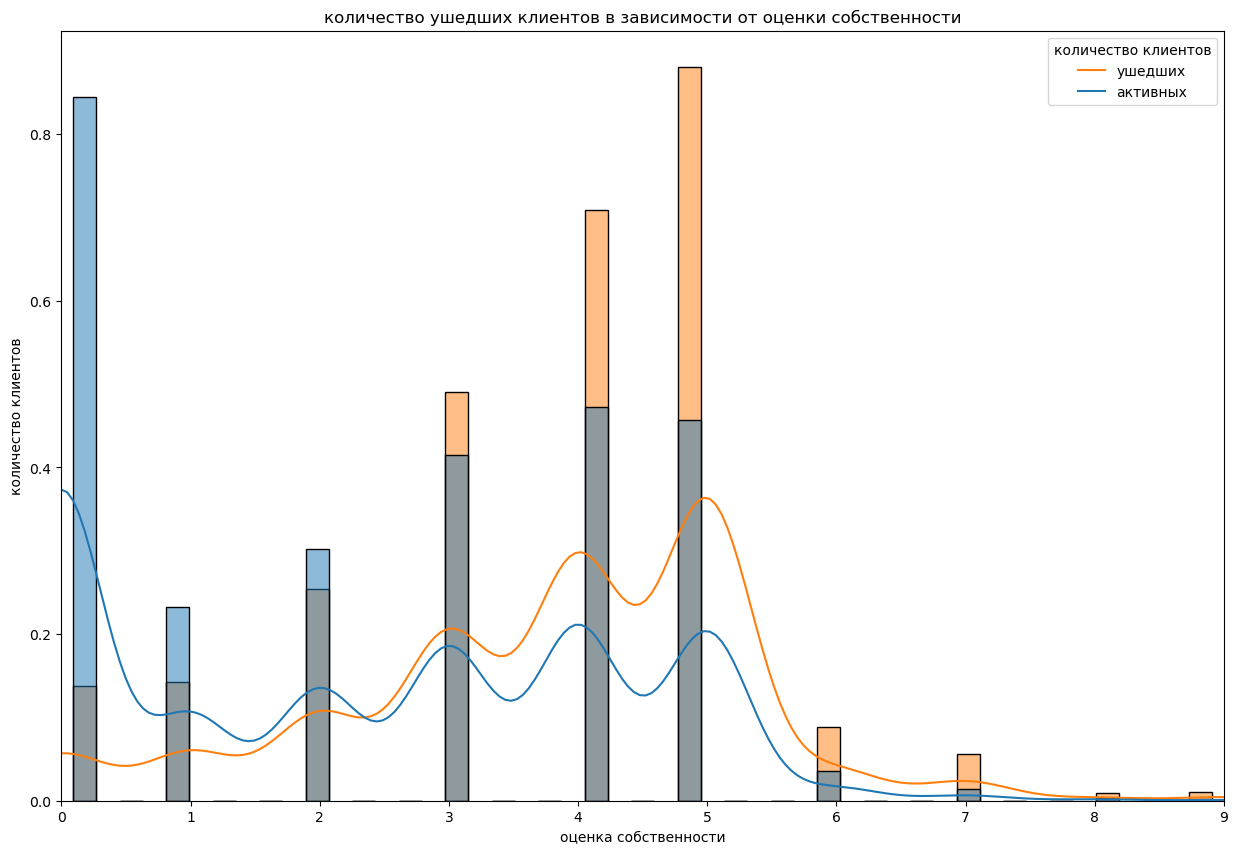

In [17]:
plt.figure(figsize=(15, 10))
sns.histplot(data, x='equity',  hue='churn', element='bars', stat='density', common_norm=False,kde=True, shrink=0.5)
plt.title('количество ушедших клиентов в зависимости от оценки собственности')
plt.xlabel('оценка собственности')
plt.ylabel('количество клиентов')
plt.legend(['ушедших', 'активных'], title='количество клиентов', loc='upper right')
plt.xlim([0, 9])
plt.show()

Количество ушедших клиентов растет с увеличением оценки собственности, но после пяти их количество уменьшается, это связано с уменьшением количества клиентов в этих сегментах

In [18]:
equity_impact = data.pivot_table(index = 'equity', values = 'churn', aggfunc = ['sum', 'count'])
equity_impact.columns = equity_impact.columns.droplevel(level=1)
equity_impact['%'] = equity_impact['sum']/equity_impact['count']*100
equity_impact_sorted = equity_impact.sort_values('%', ascending=False)
equity_impact_sorted

,sum,count,%
equity,,,
9,7,13,53.846154
7,37,79,46.835443
6,58,161,36.024845
8,6,17,35.294118
5,576,1910,30.157068
4,464,1841,25.203694
3,321,1531,20.966688
2,166,1046,15.869981
1,93,771,12.062257


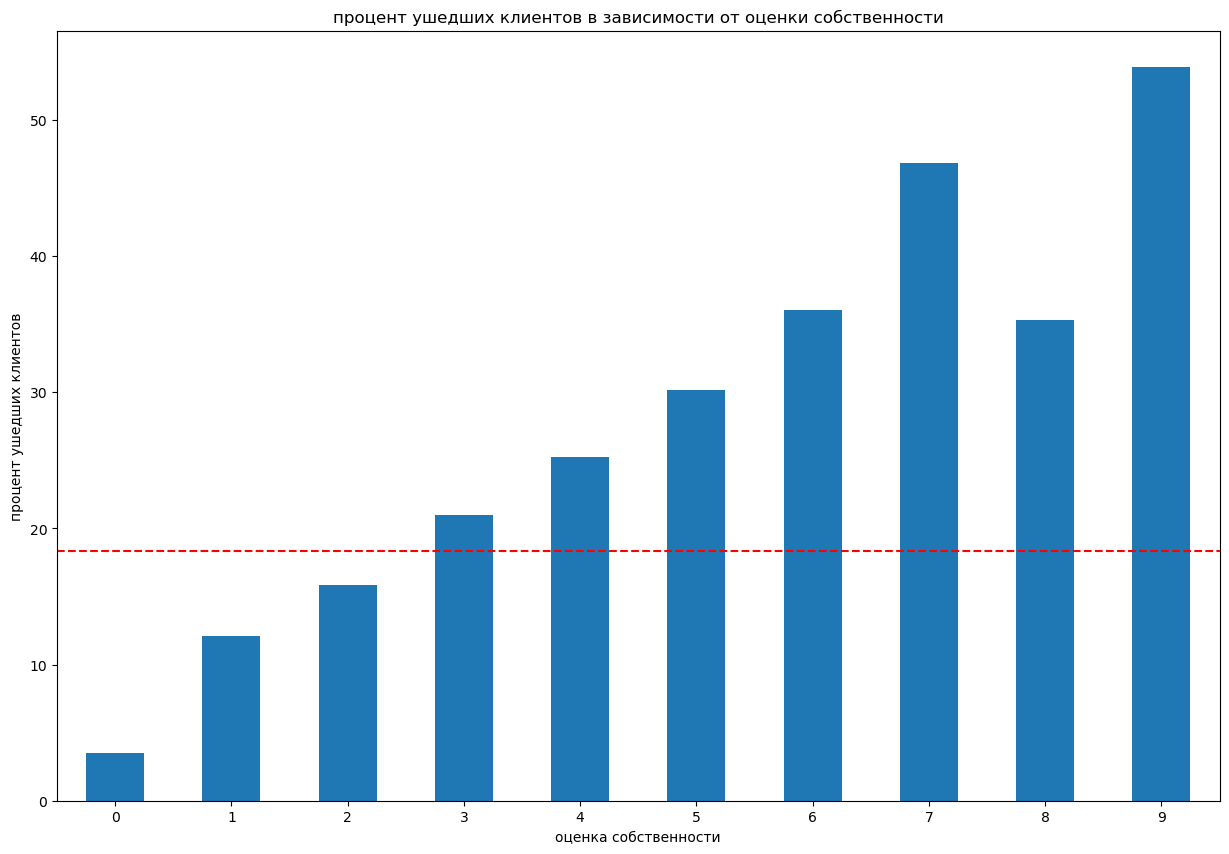

In [19]:
equity_impact['%'].plot(kind = 'bar', figsize = (15,10), rot=0,
                               title = 'процент ушедших клиентов в зависимости от оценки собственности',
                               xlabel = 'оценка собственности',
                               ylabel = 'процент ушедших клиентов'
                              )
plt.axhline (y=sum(equity_impact['sum'])/sum(equity_impact['count'])*100, color='red', linestyle='--')
plt.show()

В процентном соотношении мы видим практически линейное увеличение количества ушедших клиентов

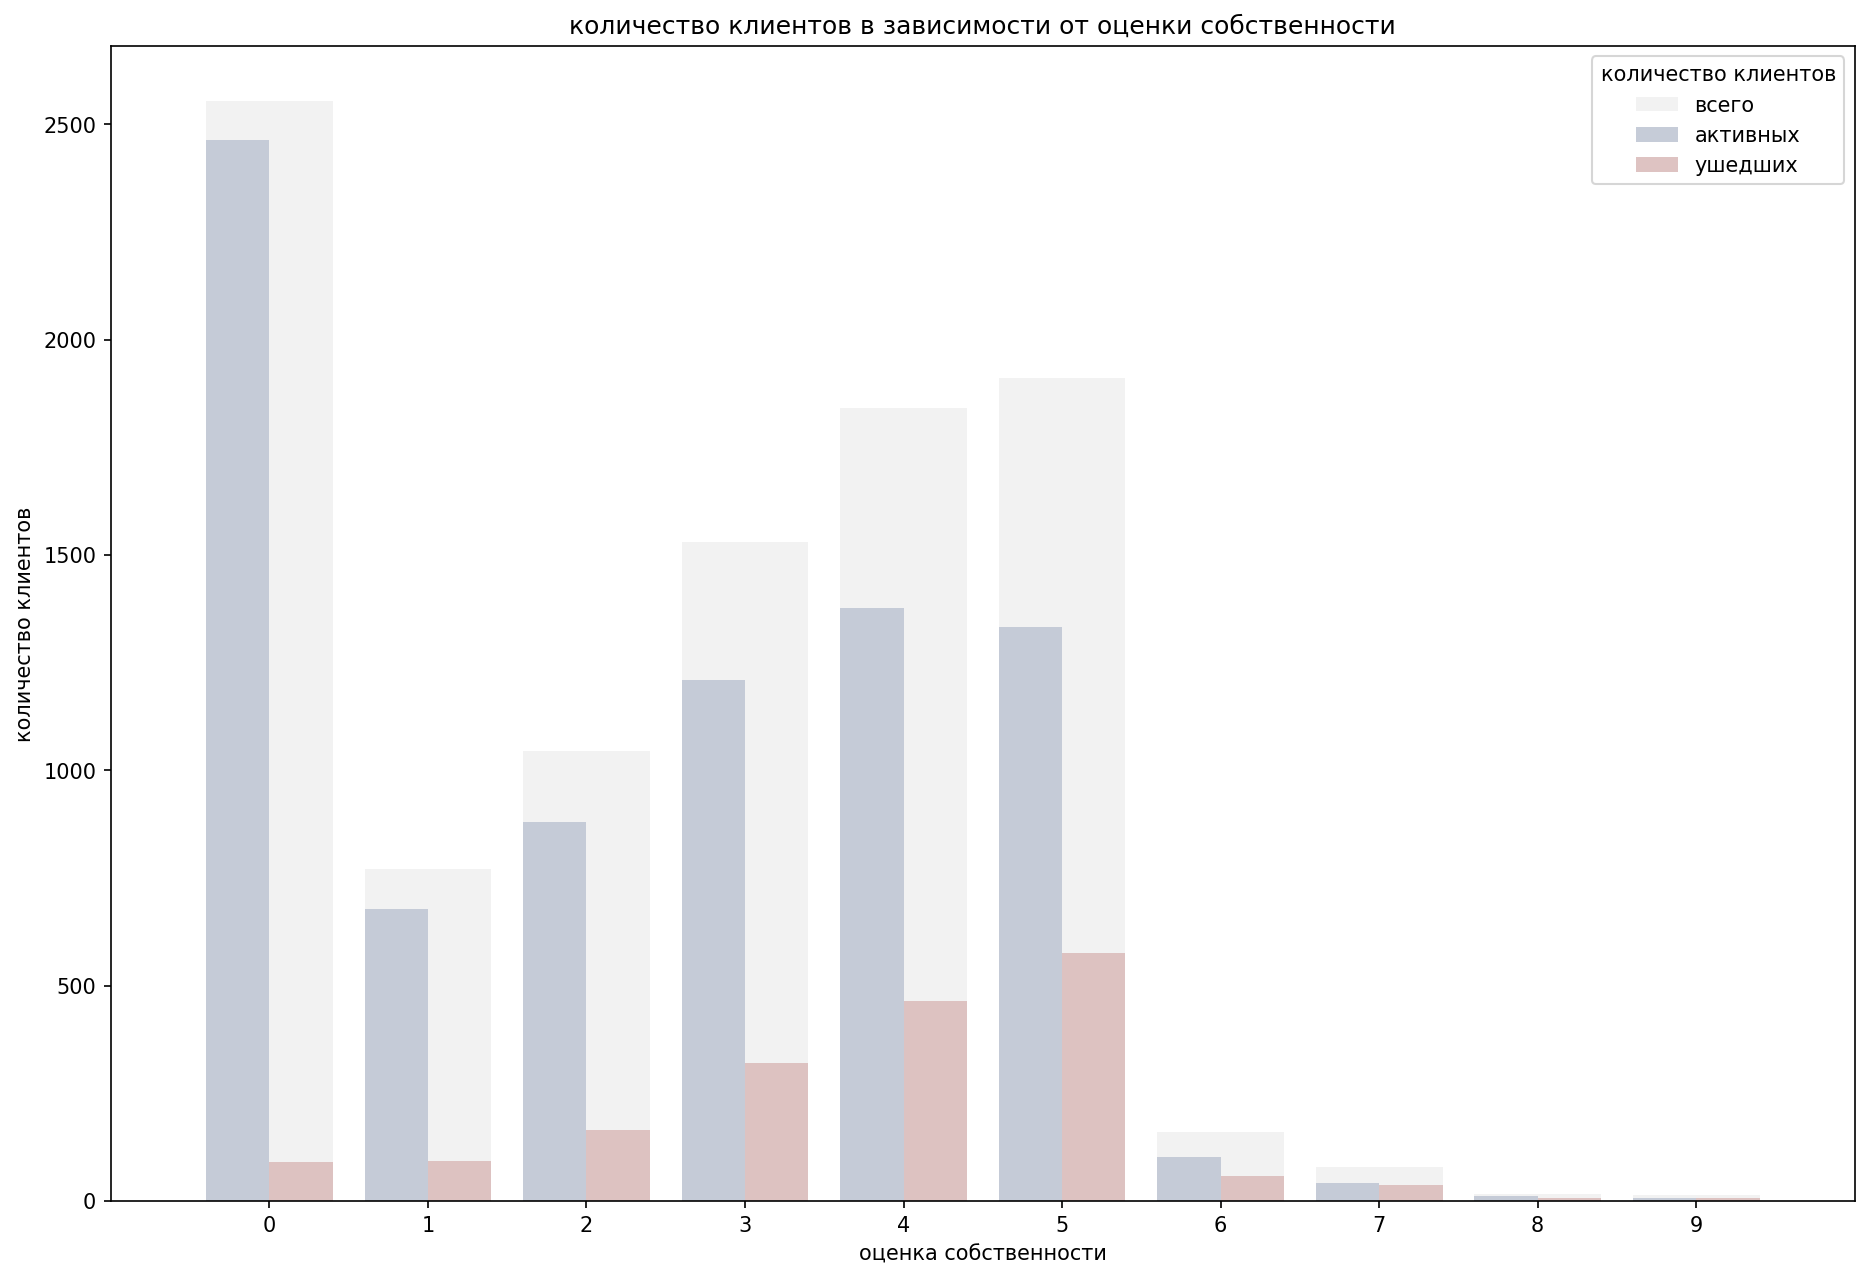

In [20]:
fig, ax = plt.subplots(figsize=(15,10), dpi=150)

sns.countplot(
            data=data,
            x='equity',
            color='black',
            alpha=0.05
           )

sns.countplot(
            data=data,
            x='equity',
            hue='churn',
            palette='vlag',
            alpha=0.9
           )

ax.set_title('количество клиентов в зависимости от оценки собственности')
ax.set_xlabel('оценка собственности')
ax.set_ylabel('количество клиентов')
ax.set_xlim(-1,10)
ax.legend(['всего', 'активных', 'ушедших'], title='количество клиентов', loc='upper right')
plt.show()

На общем графике видим постепенное увеличение количества ушедших клиентов с максимальным количеством ушедших в сегменте с оценкой собственности равной пяти. Для дальнейшей сегментации отберем клиентов с оценкой собственности четыре и выше

### Влияние баланса на уход клиентов

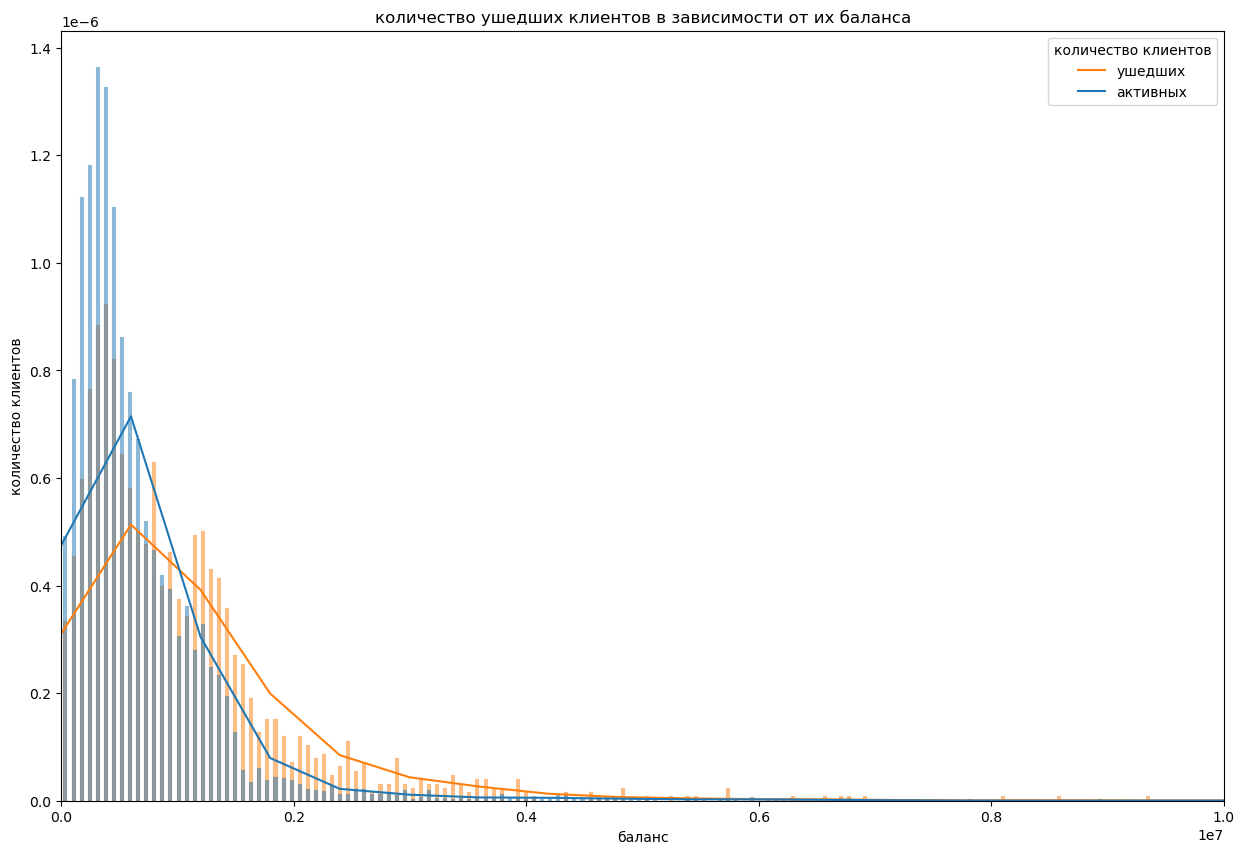

In [21]:
plt.figure(figsize=(15, 10))
sns.histplot(data, x='balance',  hue='churn', element='bars', stat='density', common_norm=False,kde=True, shrink=0.5)
plt.title('количество ушедших клиентов в зависимости от их баланса')
plt.xlabel('баланс')
plt.ylabel('количество клиентов')
plt.legend(['ушедших', 'активных'], title='количество клиентов', loc='upper right')
plt.xlim([0, 10000000])
plt.show()

На графике видим, что в районе 1800000 количество ушедших клиентов больше, чем активных и с увеличением баланса таких сегментов становится больше

In [22]:
def balance_group(balance):
    if 0 <= balance < 500000:
        return '0-500K'
    if 500000 <= balance < 1000000:
        return '500K-1M'
    if 1000000 <= balance < 2000000:
        return '1M-2M'
    if 2000000 <= balance < 3000000:
        return '2M-3M'
    if 3000000 <= balance < 4000000:
        return '3M-4M'
    if 4000000 <= balance < 5000000:
        return '4M-5M'
    if 5000000 <= balance < 10000000:
        return '5M-10M'
    if balance >= 10000000:
        return '10M-120M' 
    
data['balance_group'] = data['balance'].apply(balance_group)

Уточняем категории балансов, для более удобного анализа, для меньших балансов зададим более короткий шаг

In [23]:
balance_impact = data.pivot_table(index = 'balance_group', values = 'churn', aggfunc = ['sum', 'count'])
balance_impact.columns = balance_impact.columns.droplevel(level=1)
balance_impact['%'] = balance_impact['sum']/balance_impact['count']*100
balance_impact_sorted = balance_impact.sort_values('%', ascending=False)
balance_impact_sorted

,sum,count,%
balance_group,,,
3M-4M,53,89,59.550562
2M-3M,119,227,52.422907
10M-120M,11,27,40.740741
1M-2M,512,1439,35.580264
5M-10M,15,45,33.333333
4M-5M,12,39,30.769231
500K-1M,468,2122,22.054665
0-500K,616,3676,16.757345


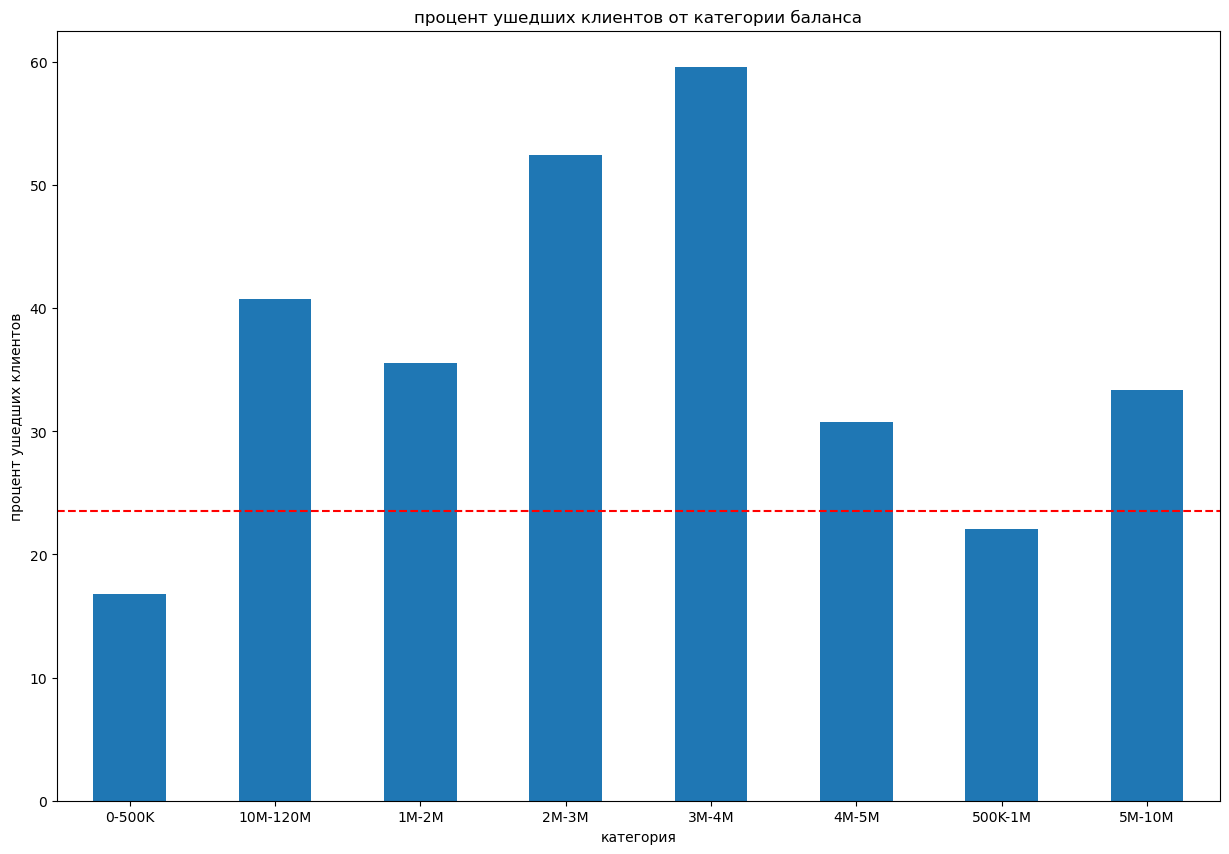

In [24]:
balance_impact['%'].plot(kind = 'bar', figsize = (15,10), rot = 0,
                                title = 'процент ушедших клиентов от категории баланса',
                                xlabel = 'категория', 
                                ylabel = 'процент ушедших клиентов'
                               )
plt.axhline (y=sum(balance_impact['sum'])/sum(balance_impact['count'])*100, color='red', linestyle='--')
plt.show()

Лидерами отточности в процентном соотношении стали балансы от 1 до 4 миллионов и сегмент с самыми большими балансами (свыше 10 миллионов)

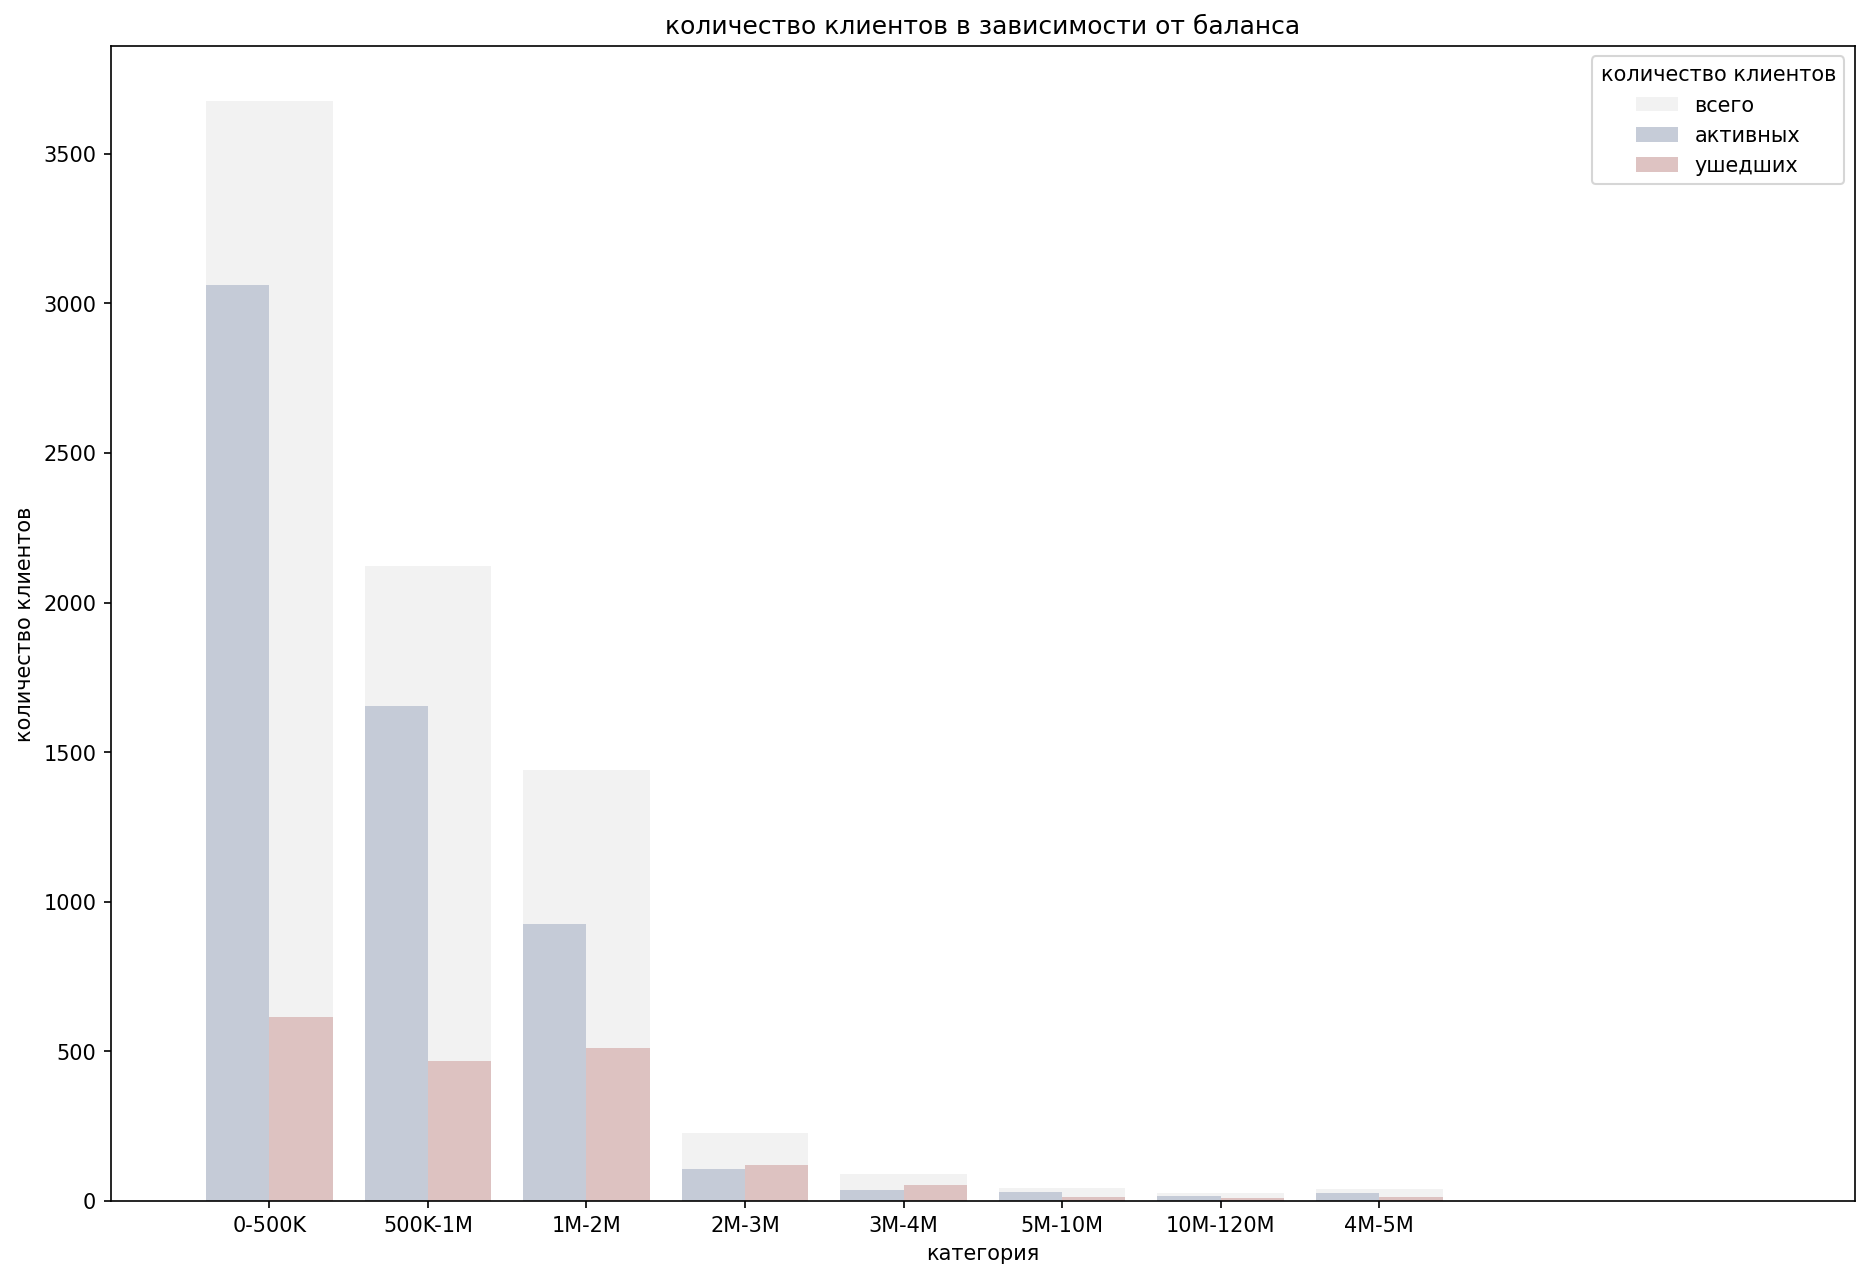

In [25]:
fig, ax = plt.subplots(figsize=(15,10), dpi=150)

sns.countplot(
            data=data,
            x='balance_group',
            color='black',
            alpha=0.05
           )

sns.countplot(
            data=data,
            x='balance_group',
            hue='churn',
            palette='vlag',
            alpha=0.9
           )

ax.set_title('количество клиентов в зависимости от баланса')
ax.set_xlabel('категория')
ax.set_ylabel('количество клиентов')
ax.set_xlim(-1,10)
ax.legend(['всего', 'активных', 'ушедших'], title='количество клиентов', loc='upper right')
plt.show()

На общем графике видим, что доля лидеров оттока в процентном соотношении мала по отношению к общему количеству клиентов. Для сегментации отберем категории балансов свыше 1 миллиона

### Влияние количества продуктов на уход клиентов

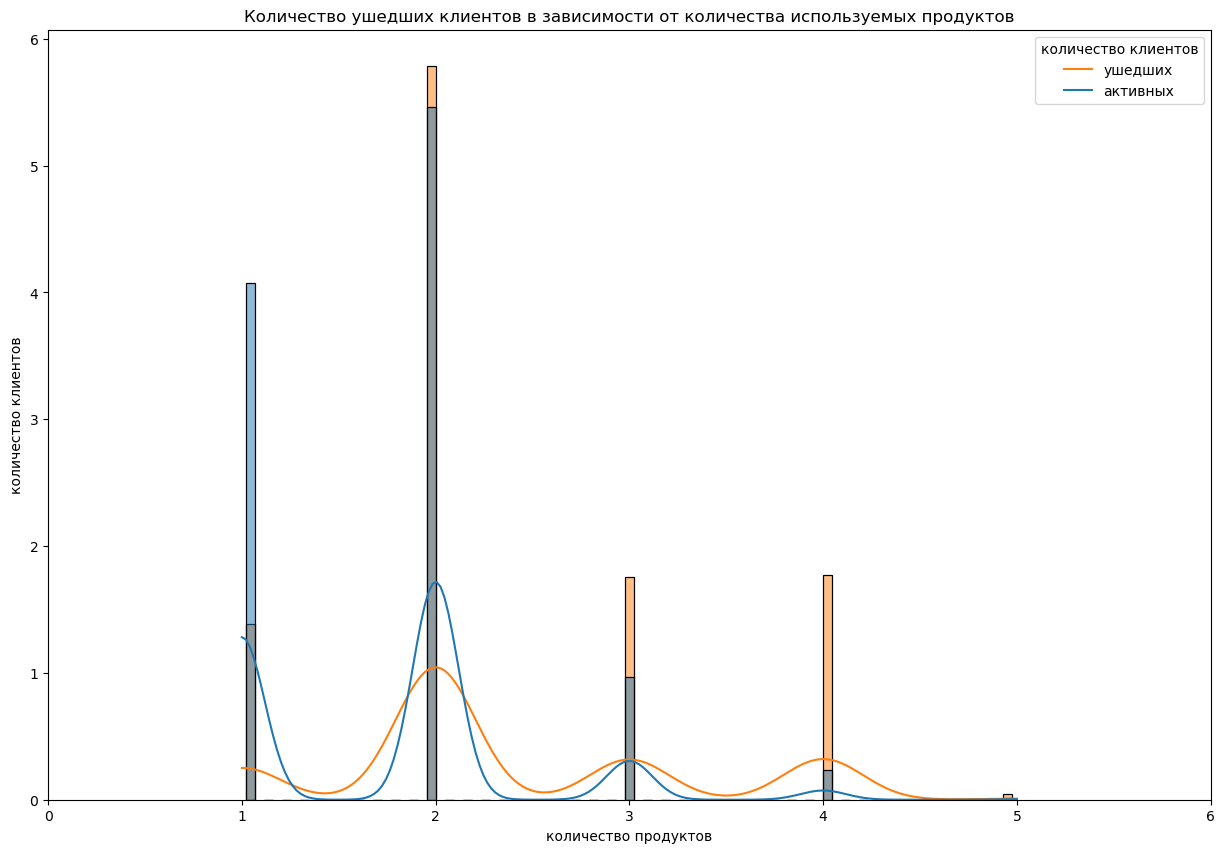

In [26]:
plt.figure(figsize=(15, 10))
sns.histplot(data, x='products',  hue='churn', element='bars', stat='density', common_norm=False,kde=True, shrink=0.5)
plt.title('Количество ушедших клиентов в зависимости от количества используемых продуктов')
plt.xlabel('количество продуктов')
plt.ylabel('количество клиентов')
plt.legend(['ушедших', 'активных'], title='количество клиентов', loc='upper right')
plt.xlim([0, 6])
plt.show()

Сразу видим, что количество ушедших клиентов с 4 продуктами больше, чем активных

In [27]:
products_impact = data.pivot_table(index = 'products', values = 'churn', aggfunc = ['sum', 'count'])
products_impact.columns = products_impact.columns.droplevel(level=1)
products_impact['%'] = products_impact['sum']/products_impact['count']*100
products_impact_sorted = products_impact.sort_values('%', ascending=False)
products_impact_sorted

,sum,count,%
products,,,
4,300,474,63.291139
5,8,19,42.105263
3,297,1029,28.862974
2,978,5095,19.195289
1,235,3306,7.108288


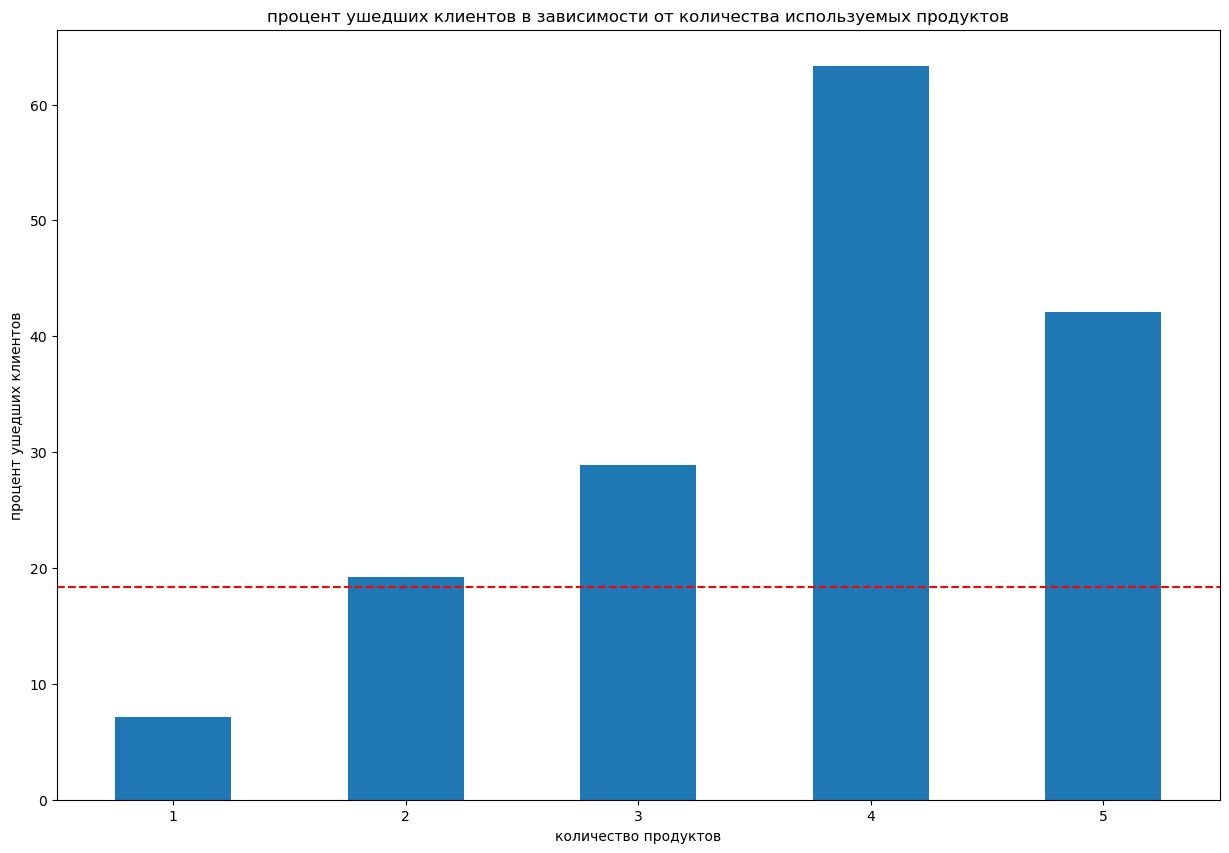

In [28]:
products_impact['%'].plot(kind = 'bar', figsize = (15,10), rot = 0,
                                 title = 'процент ушедших клиентов в зависимости от количества используемых продуктов',
                                 xlabel = 'количество продуктов', 
                                 ylabel = 'процент ушедших клиентов'
                                )
plt.axhline (y=sum(products_impact['sum'])/sum(products_impact['count'])*100, color='red', linestyle='--')
plt.show()

Клиенты с 1 и 2 продуктами показали себя наиболее лояльно, клиент без продуктов всего один.

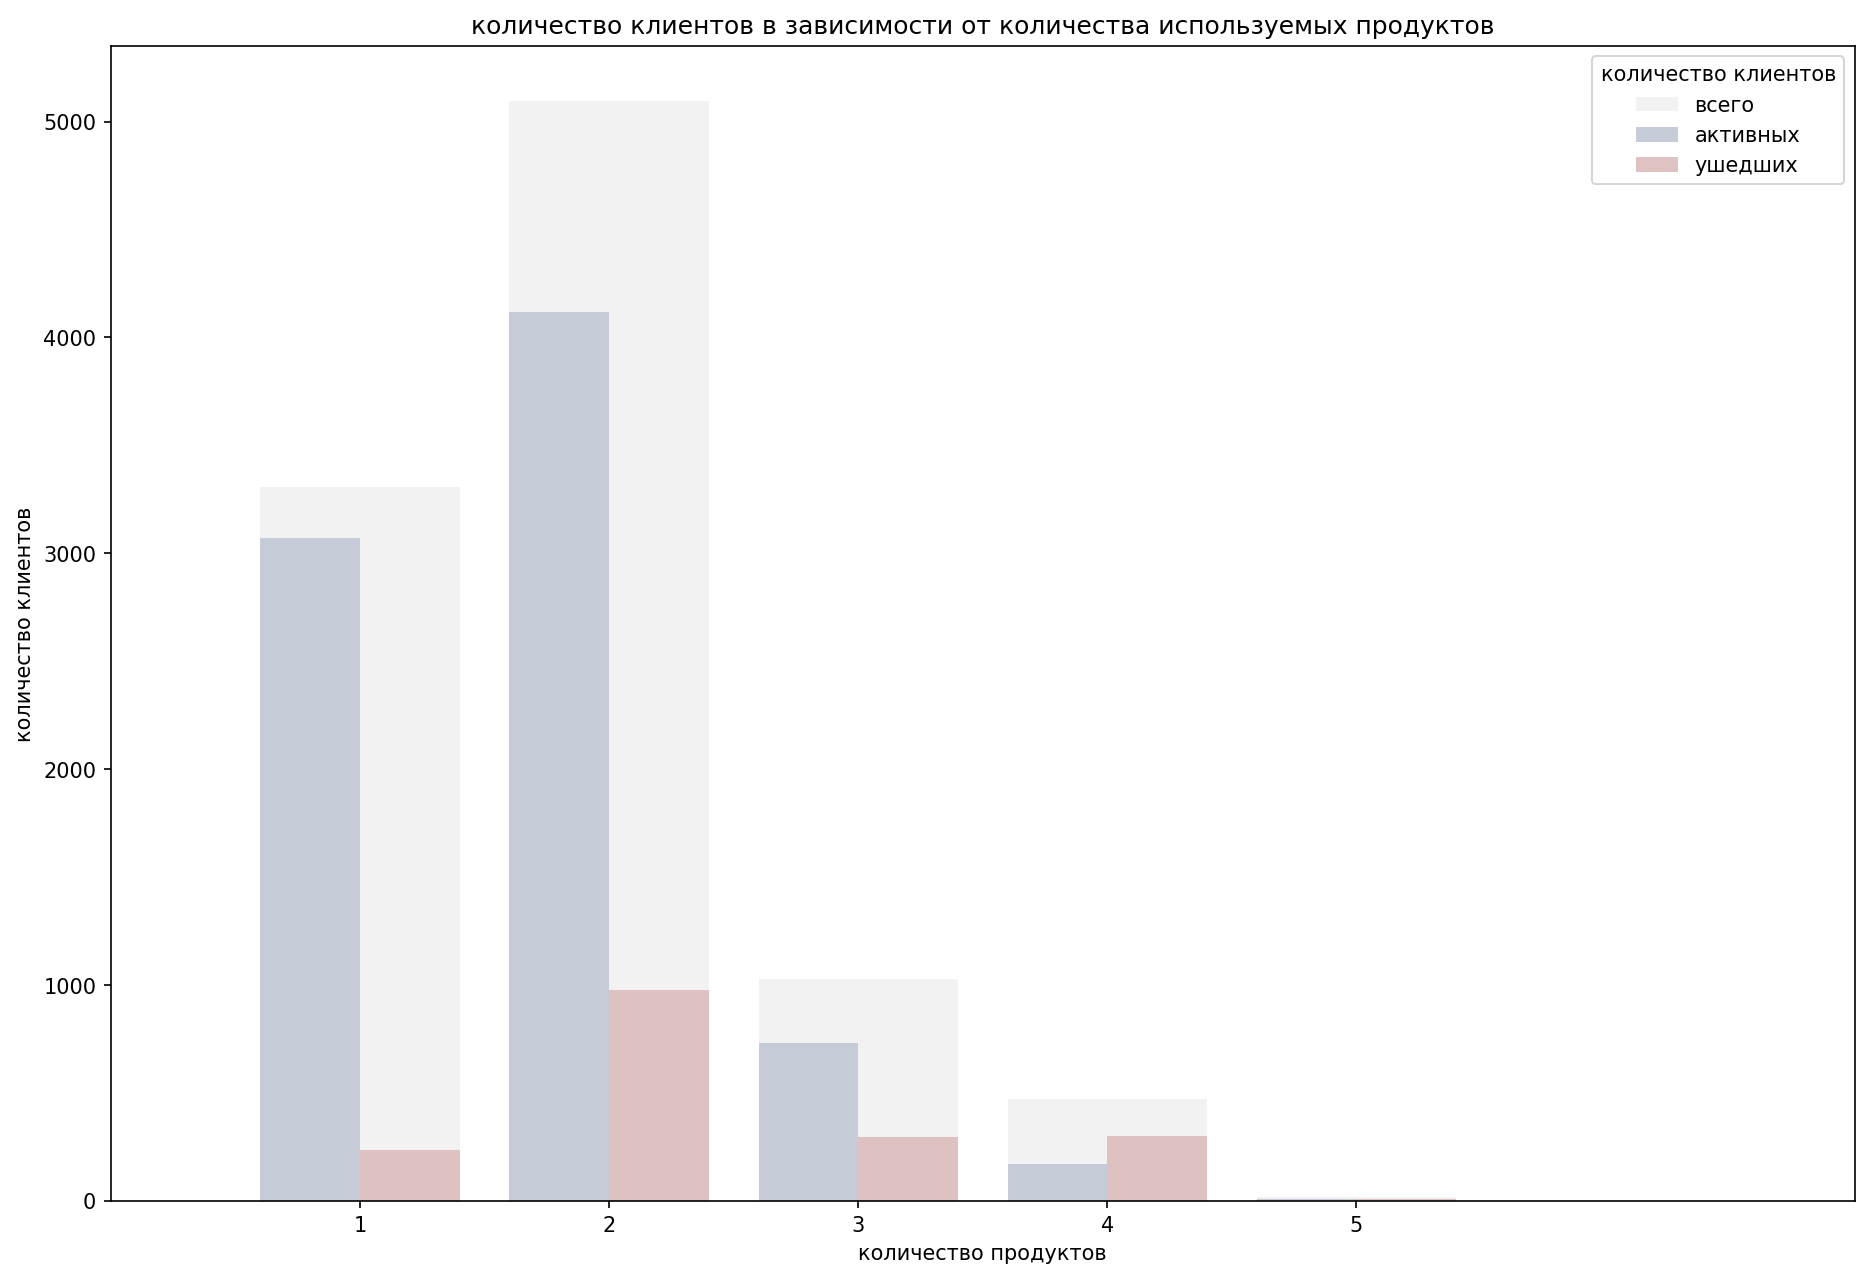

In [29]:
fig, ax = plt.subplots(figsize=(15,10), dpi=150)

sns.countplot(
            data=data,
            x='products',
            color='black',
            alpha=0.05
           )

sns.countplot(
            data=data,
            x='products',
            hue='churn',
            palette='vlag',
            alpha=0.9
           )

ax.set_title('количество клиентов в зависимости от количества используемых продуктов')
ax.set_xlabel('количество продуктов')
ax.set_ylabel('количество клиентов')
ax.set_xlim(-1,6)
ax.legend(['всего', 'активных', 'ушедших'], title='количество клиентов', loc='upper right')
plt.show()

При рассмотрении общей картины, для дальнейшего анализа выделю сегменты с 3,4 и 5 продуктами, несмотря на то что в сегменте с 5 продуктами клиентов тоже мало

### Влияние зарплаты на уход клиентов

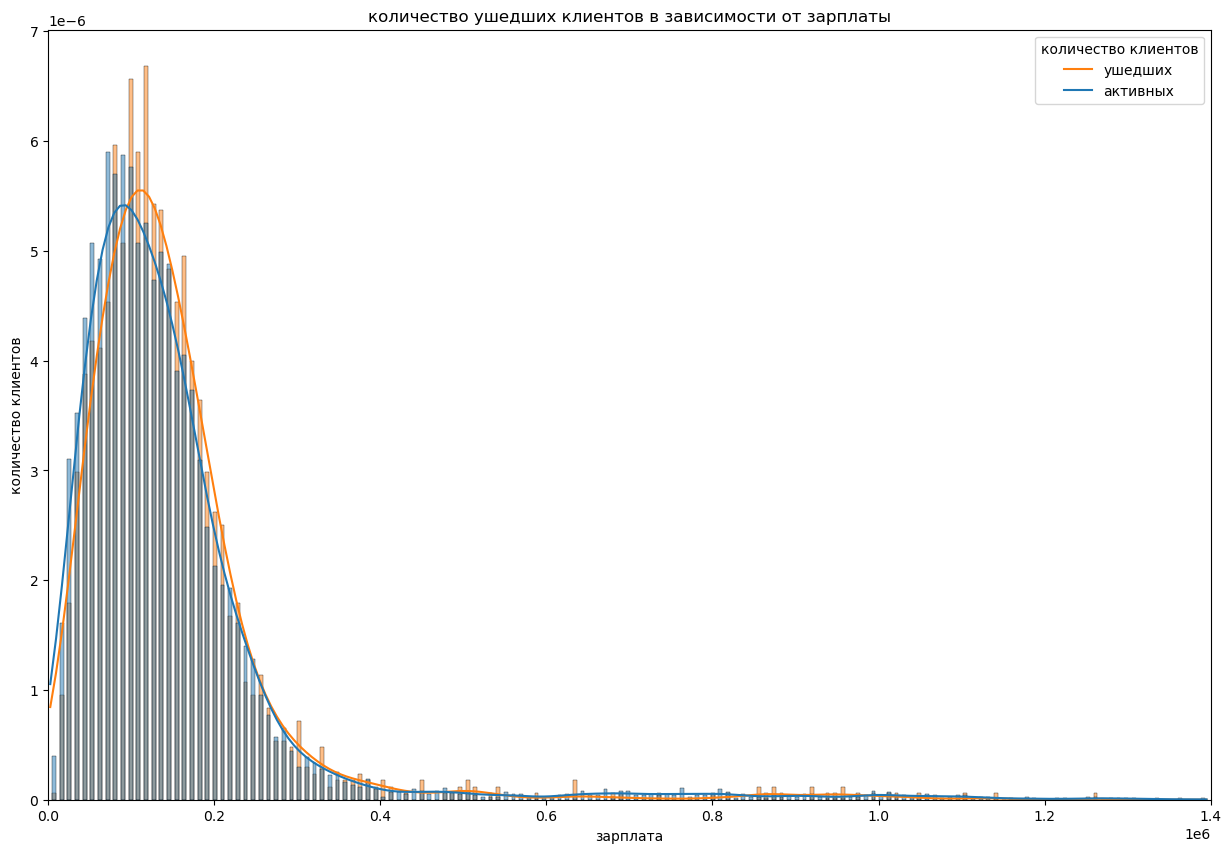

In [30]:
plt.figure(figsize=(15, 10))
sns.histplot(data, x='est_salary',  hue='churn', element='bars', stat='density', common_norm=False,kde=True, shrink=0.5)
plt.title('количество ушедших клиентов в зависимости от зарплаты')
plt.xlabel('зарплата')
plt.ylabel('количество клиентов')
plt.legend(['ушедших', 'активных'], title='количество клиентов', loc='upper right')
plt.xlim([0, 1400000])
plt.show()

Видим большое количество отточных клиентов с зарплатой до 200 тысяч

In [31]:
def est_salary_group(est_salary):
    if 0 <= est_salary < 50000:
        return '0-50K'
    if 50000 <= est_salary < 100000:
        return '50K-100K'
    if 100000 <= est_salary < 150000:
        return '100K-150K'
    if 150000 <= est_salary < 200000:
        return '150K-200K'
    if 200000 <= est_salary < 400000:
        return '200K-400K'
    if 400000 <= est_salary < 600000:
        return '400K-600K'
    if 600000 <= est_salary < 800000:
        return '600K-800K'
    if 800000 <= est_salary < 1000000:
        return '800K-1M'
    if est_salary >= 1000000:
        return '1M-1.4M' 
    
data['est_salary_group'] = data['est_salary'].apply(est_salary_group)

Сгруппируем зарплаты с шагом в 50 тысяч для удобства анализа

In [32]:
est_salary_impact = data.pivot_table(index = 'est_salary_group', values = 'churn', aggfunc = ['sum', 'count'])
est_salary_impact.columns = est_salary_impact.columns.droplevel(level=1)
est_salary_impact['%'] = est_salary_impact['sum']/est_salary_impact['count']*100
est_salary_impact_sorted = est_salary_impact.sort_values('%', ascending=False)
est_salary_impact_sorted

,sum,count,%
est_salary_group,,,
150K-200K,356,1722,20.673635
100K-150K,520,2558,20.328382
400K-600K,22,109,20.183486
800K-1M,15,77,19.480519
200K-400K,268,1407,19.047619
50K-100K,450,2710,16.605166
0-50K,174,1192,14.597315
1M-1.4M,6,59,10.169492
600K-800K,7,89,7.865169


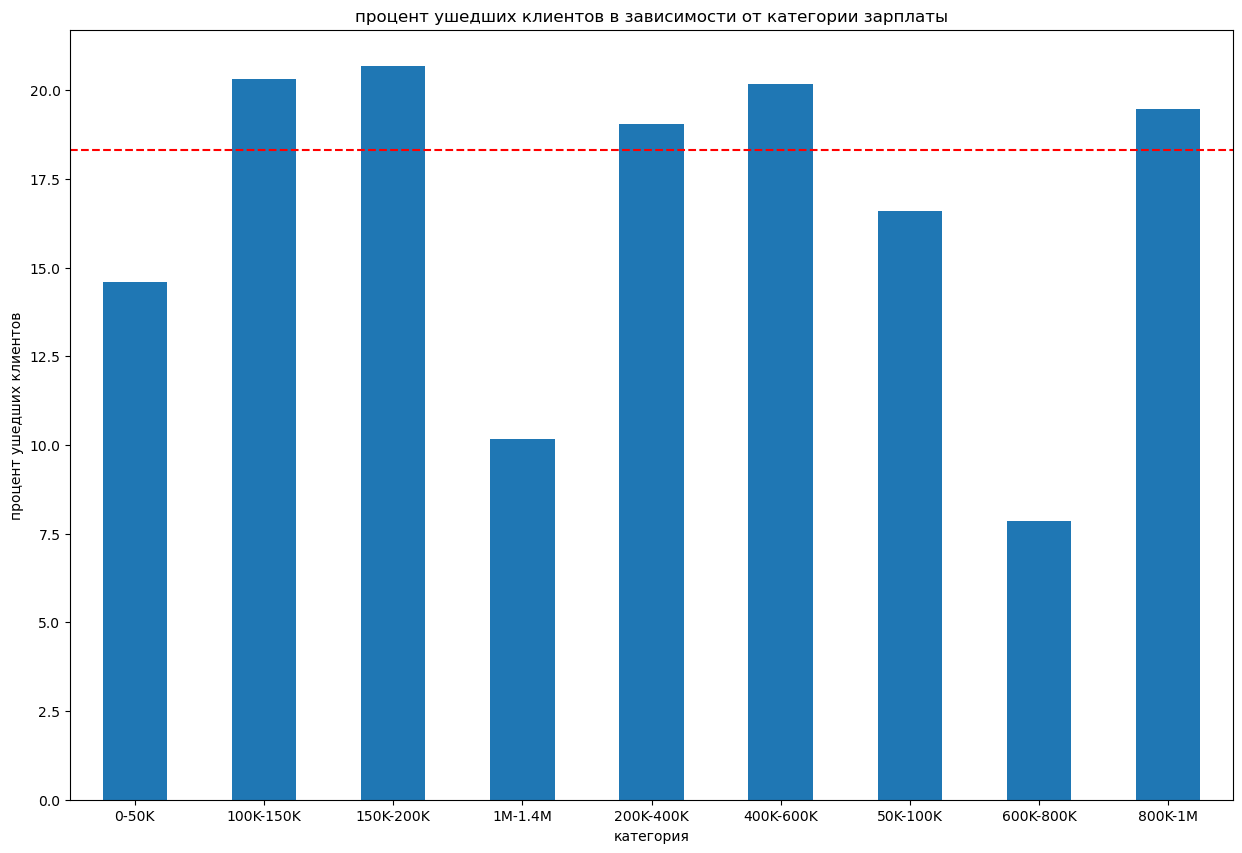

In [33]:
est_salary_impact['%'].plot(kind = 'bar', figsize = (15,10), rot = 0,
                                   title = 'процент ушедших клиентов в зависимости от категории зарплаты',
                                   xlabel = 'категория', 
                                   ylabel = 'процент ушедших клиентов'
                                  )
plt.axhline (y=sum(est_salary_impact['sum'])/sum(est_salary_impact['count'])*100, color='red', linestyle='--')
plt.show()

Как и предполагалось выше наиболее отточными сегментами в процентном соотношении являютя сегменты от 100 до 200 тыс. сегмент с зп 400-600 тыс тоже заслуживает внимания

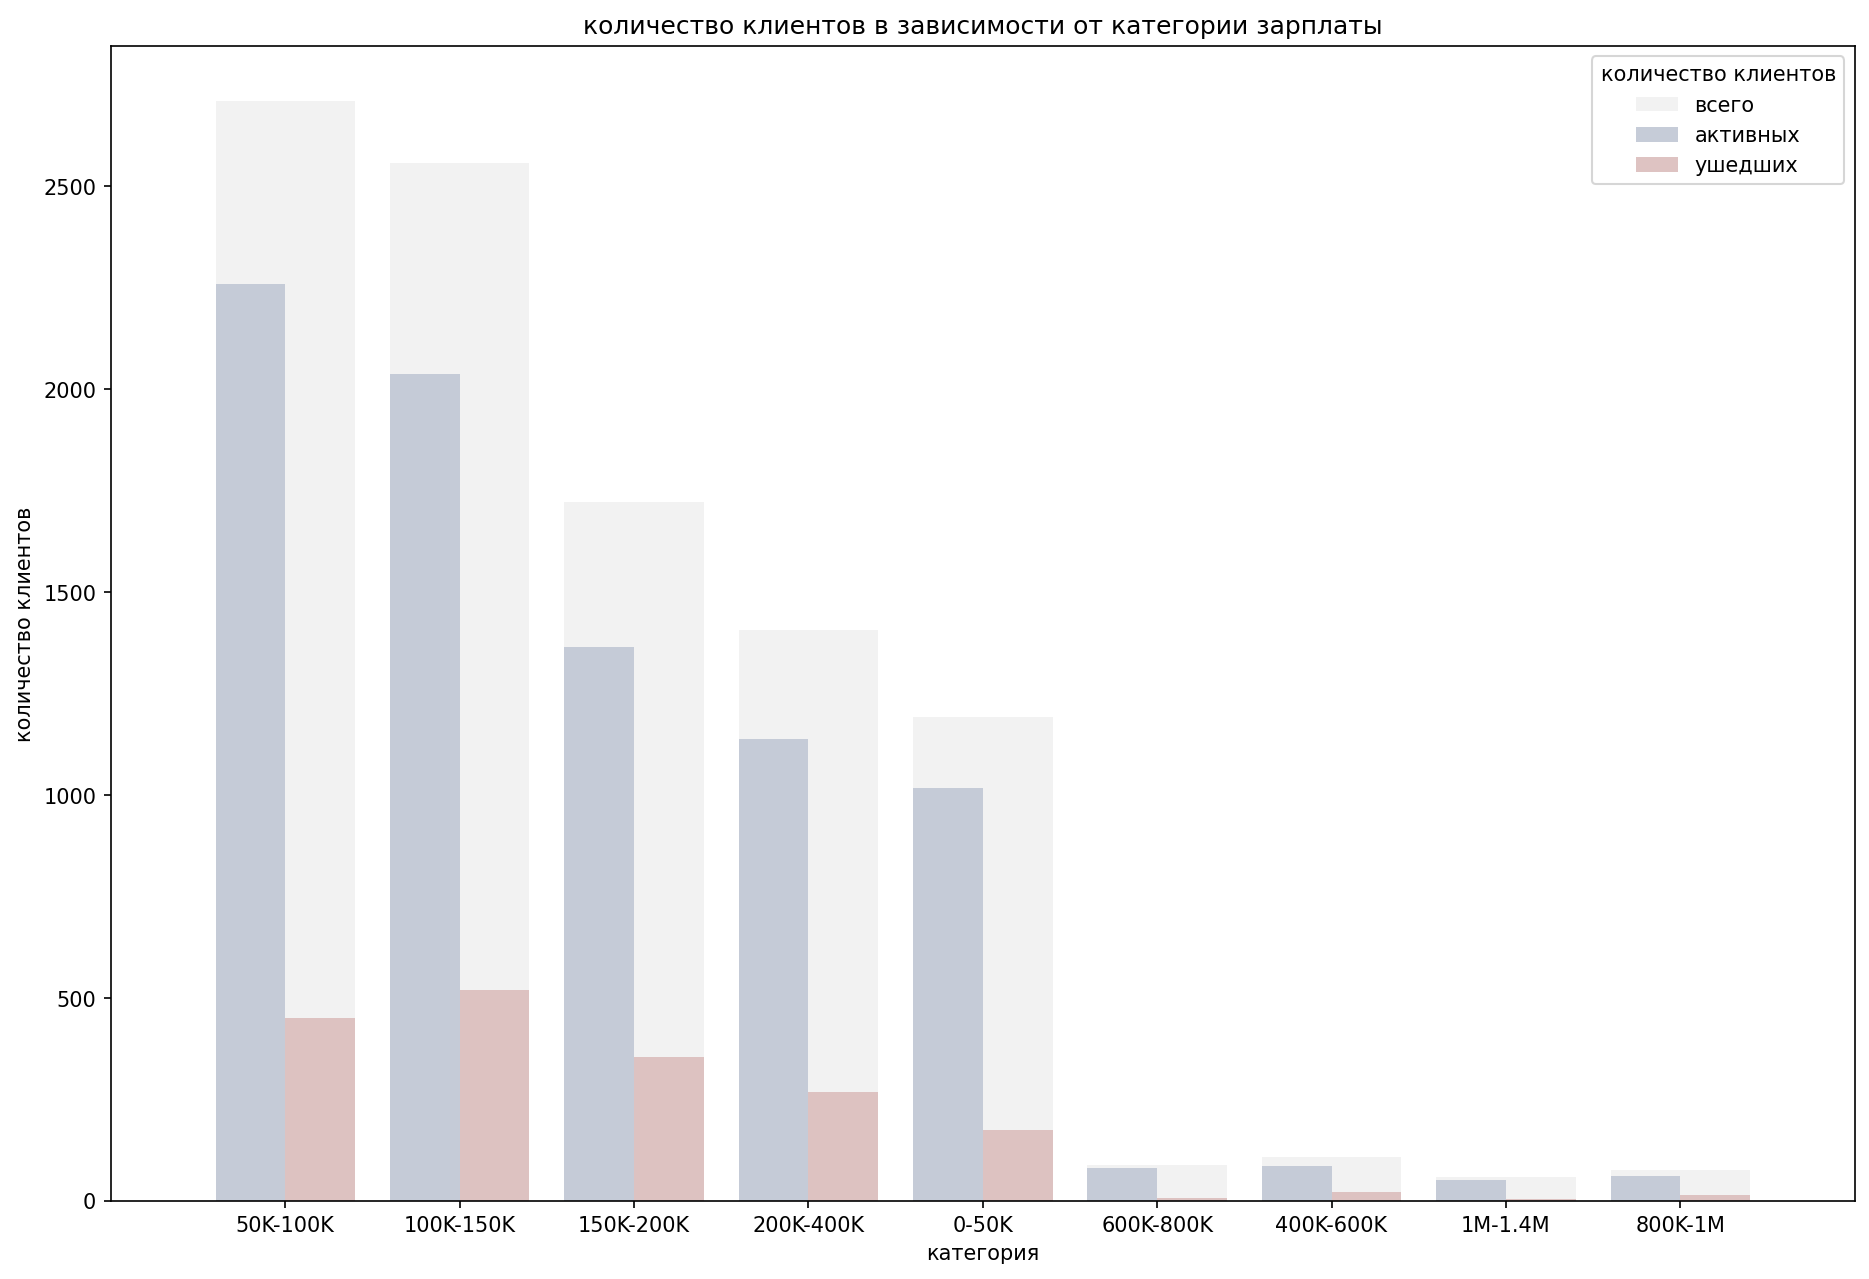

In [34]:
fig, ax = plt.subplots(figsize=(15,10), dpi=150)

sns.countplot(
            data=data,
            x='est_salary_group',
            color='black',
            alpha=0.05
           )

sns.countplot(
            data=data,
            x='est_salary_group',
            hue='churn',
            palette='vlag',
            alpha=0.9
           )

ax.set_title('количество клиентов в зависимости от категории зарплаты')
ax.set_xlabel('категория')
ax.set_ylabel('количество клиентов')
ax.set_xlim(-1,9)
ax.legend(['всего', 'активных', 'ушедших'], title='количество клиентов', loc='upper right')
plt.show()

Для дальнейшей сегментации отберем следующие категории 100-200 тыс, так как количество ушедших в этих сегментах велико и сегмент 400-600 тыс, так как ушедших много в процентном соотношении

### Влияние возраста на уход клиентов

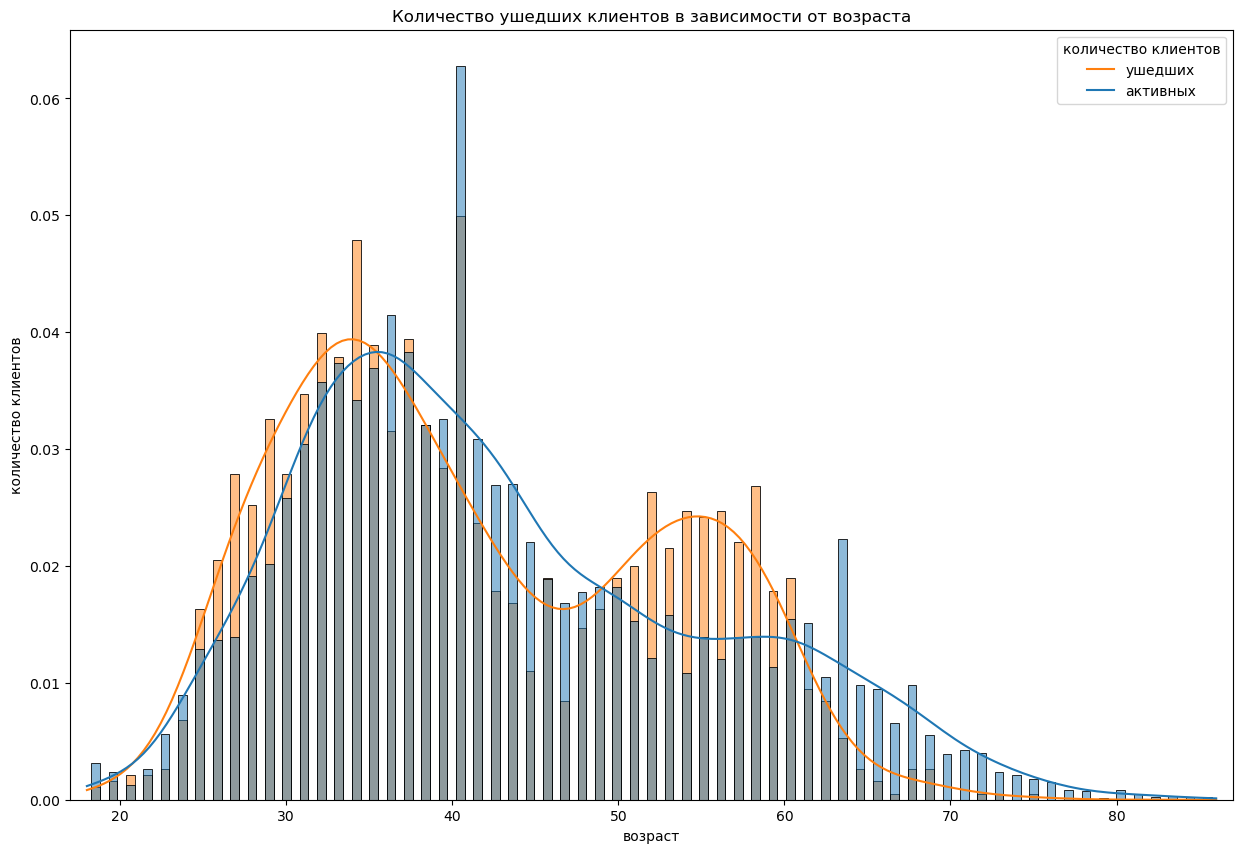

In [35]:
plt.figure(figsize=(15, 10))
sns.histplot(data, x='age',  hue='churn', element='bars', stat='density', common_norm=False,kde=True, shrink=0.5, bins=65)
plt.title('Количество ушедших клиентов в зависимости от возраста')
plt.xlabel('возраст')
plt.ylabel('количество клиентов')
plt.legend(['ушедших', 'активных'], title='количество клиентов', loc='upper right')
plt.xlim([17, 87])
plt.show()

На графике видим пики в районе 35 лет, но это может быть связано с общим количеством наблюдений

In [36]:
def age_group(age):
    if 0 <= age < 25:
        return '18-25'
    if 25 <= age < 35:
        return '25-35 '
    if 35 <= age < 45:
        return '35-45 '
    if 45 <= age < 55:
        return '45-55'
    if 55 <= age < 65:
        return '55-65'
    if 65 <= age < 75:
        return '65-75'
    if 75 <= age < 85:
        return '75-85'
    if age >= 85:
        return '>85 ' 
    
data['age_group'] = data['age'].apply(age_group)

In [37]:
age_impact = data.pivot_table(index = 'age_group', values = 'churn', aggfunc = ['sum', 'count'])
age_impact.columns = age_impact.columns.droplevel(level=1)
age_impact['%'] = age_impact['sum']/age_impact['count']*100
age_impact_sorted = age_impact.sort_values('%', ascending=False)
age_impact_sorted

,sum,count,%
age_group,,,
25-35,591,2654,22.268274
55-65,300,1389,21.598272
45-55,344,1752,19.634703
35-45,530,3319,15.968665
18-25,31,235,13.191489
65-75,21,511,4.109589
75-85,1,61,1.639344
>85,0,2,0.000000


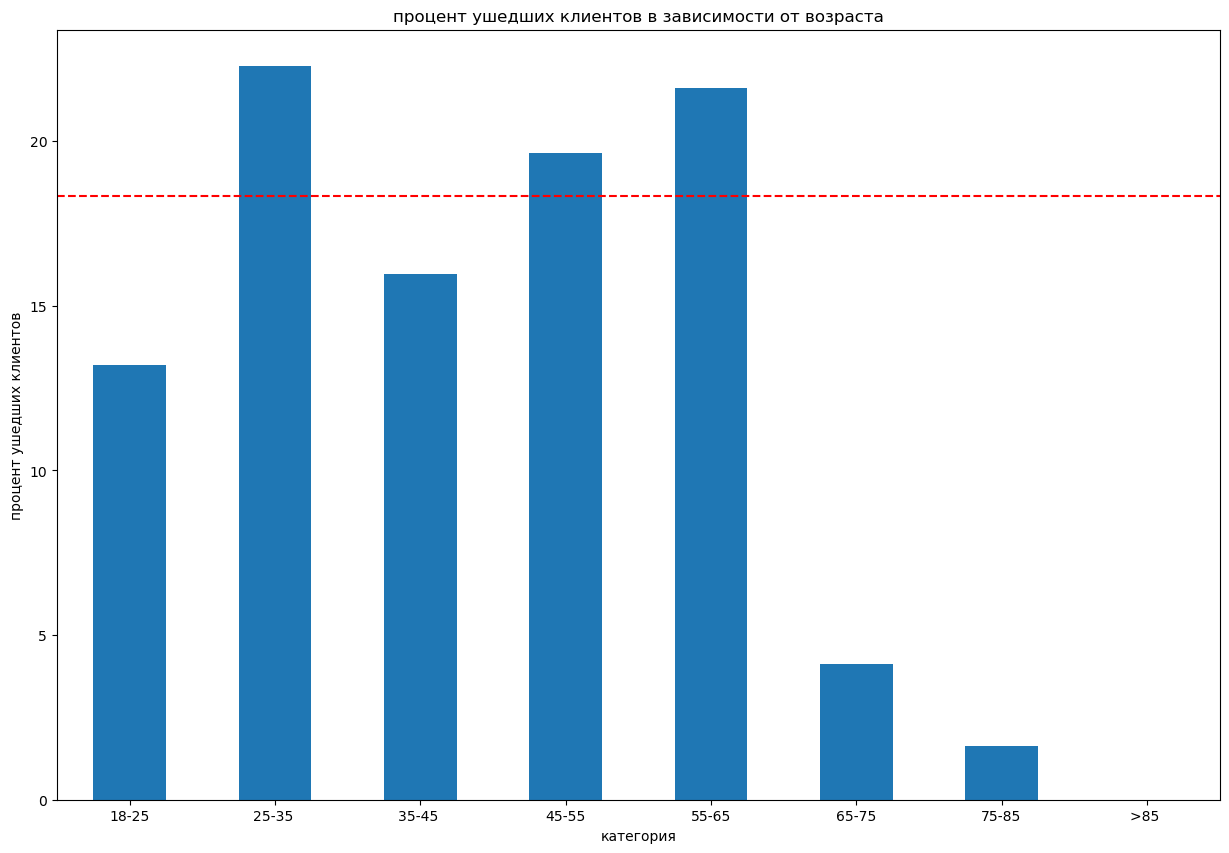

In [38]:
age_impact['%'].plot(kind = 'bar', figsize = (15,10), rot = 0,
                            title = 'процент ушедших клиентов в зависимости от возраста',
                            xlabel = 'категория', 
                            ylabel = 'процент ушедших клиентов'
                           )
plt.axhline (y=sum(age_impact['sum'])/sum(age_impact['count'])*100, color='red', linestyle='--')
plt.show()

Видим высокий уровень оттока среди групп 25-35, 45-55, 55-65

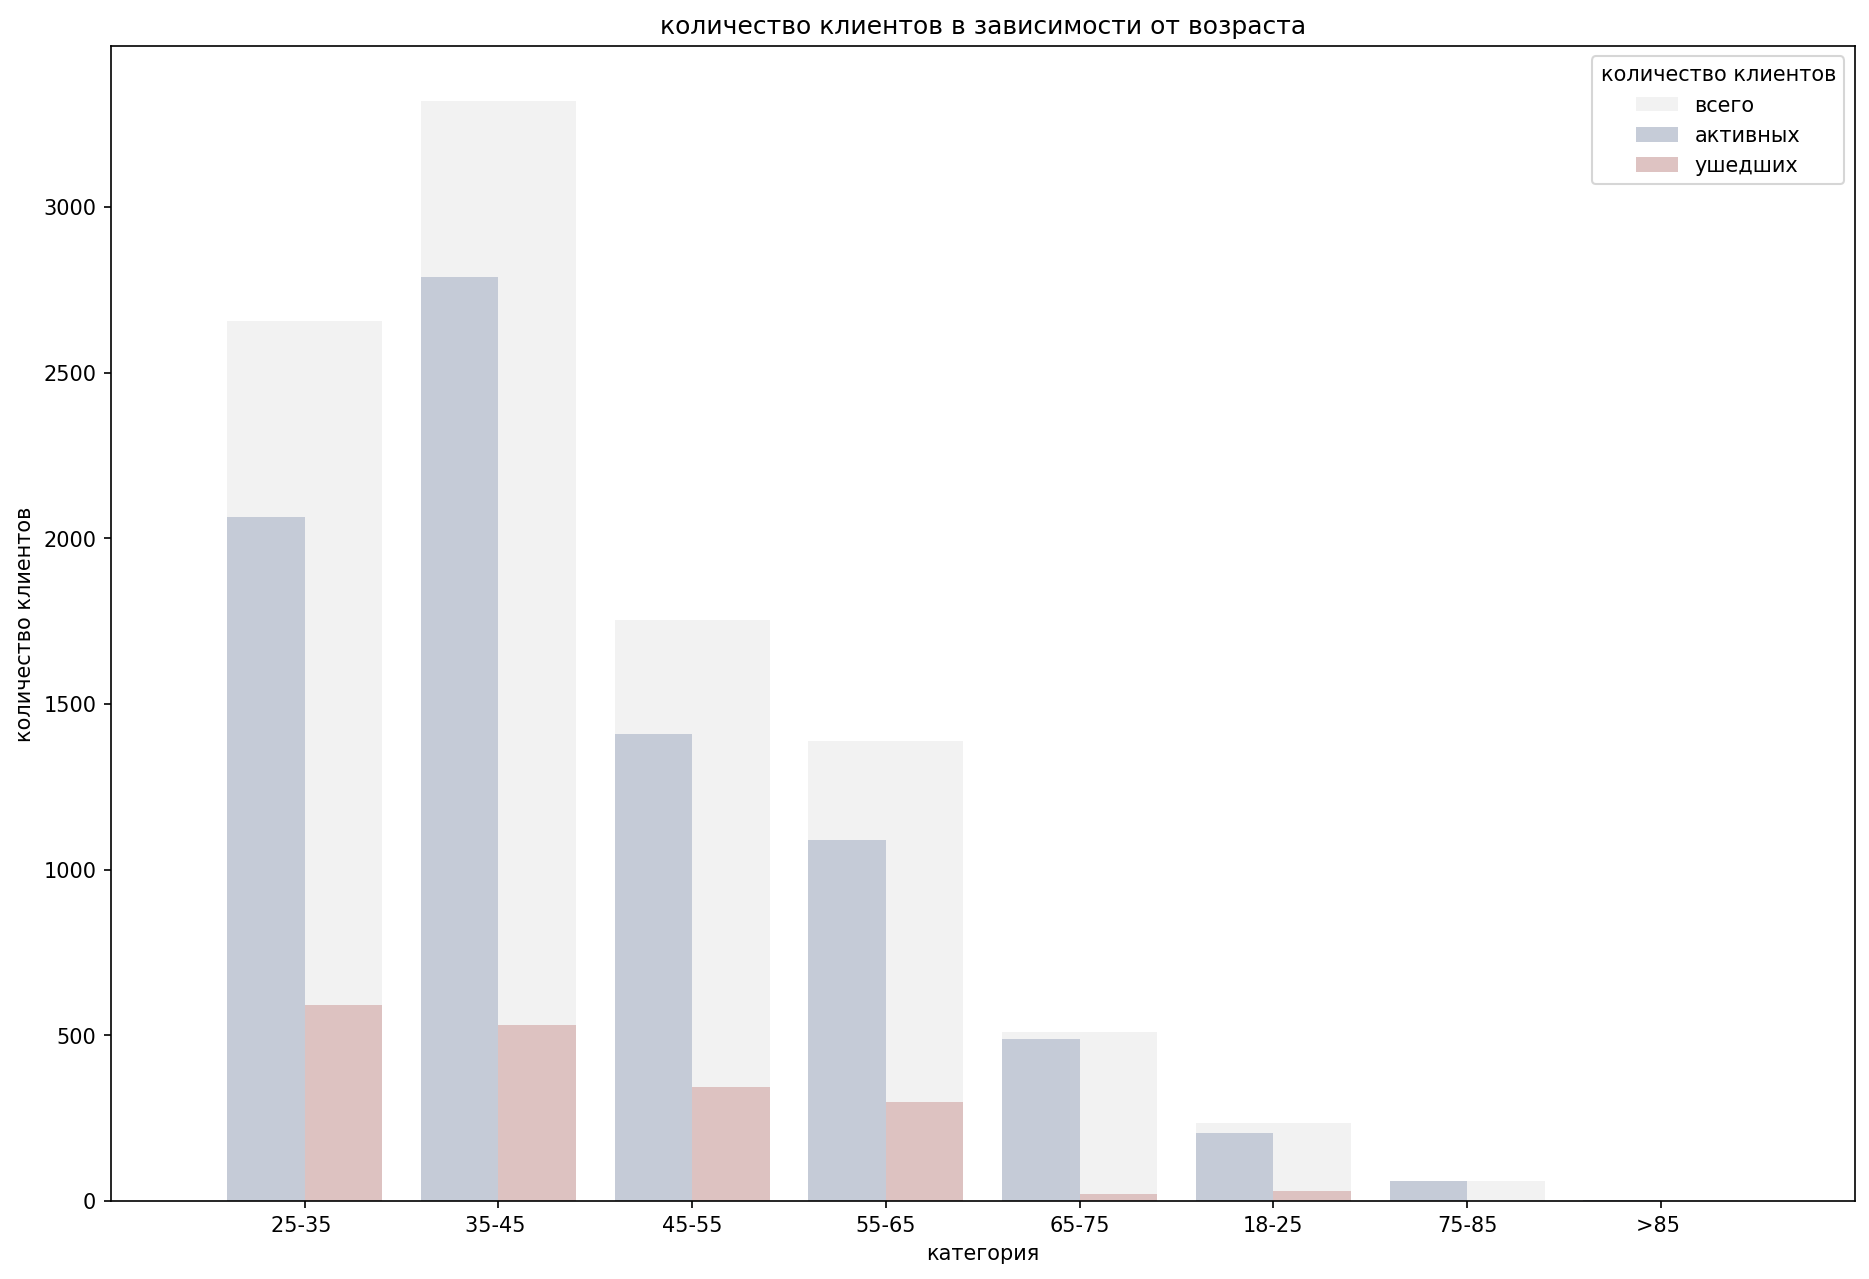

In [39]:
fig, ax = plt.subplots(figsize=(15,10), dpi=150)

sns.countplot(
            data=data,
            x='age_group',
            color='black',
            alpha=0.05
           )

sns.countplot(
            data=data,
            x='age_group',
            hue='churn',
            palette='vlag',
            alpha=0.9
           )

ax.set_title('количество клиентов в зависимости от возраста')
ax.set_xlabel('категория')
ax.set_ylabel('количество клиентов')
ax.set_xlim(-1,8)
ax.legend(['всего', 'активных', 'ушедших'], title='количество клиентов', loc='upper right')
plt.show()

Для дальнейшей сегментации выделим среднюю возрастную группу

### Влияние баллов кредитного скоринга на уход клиентов

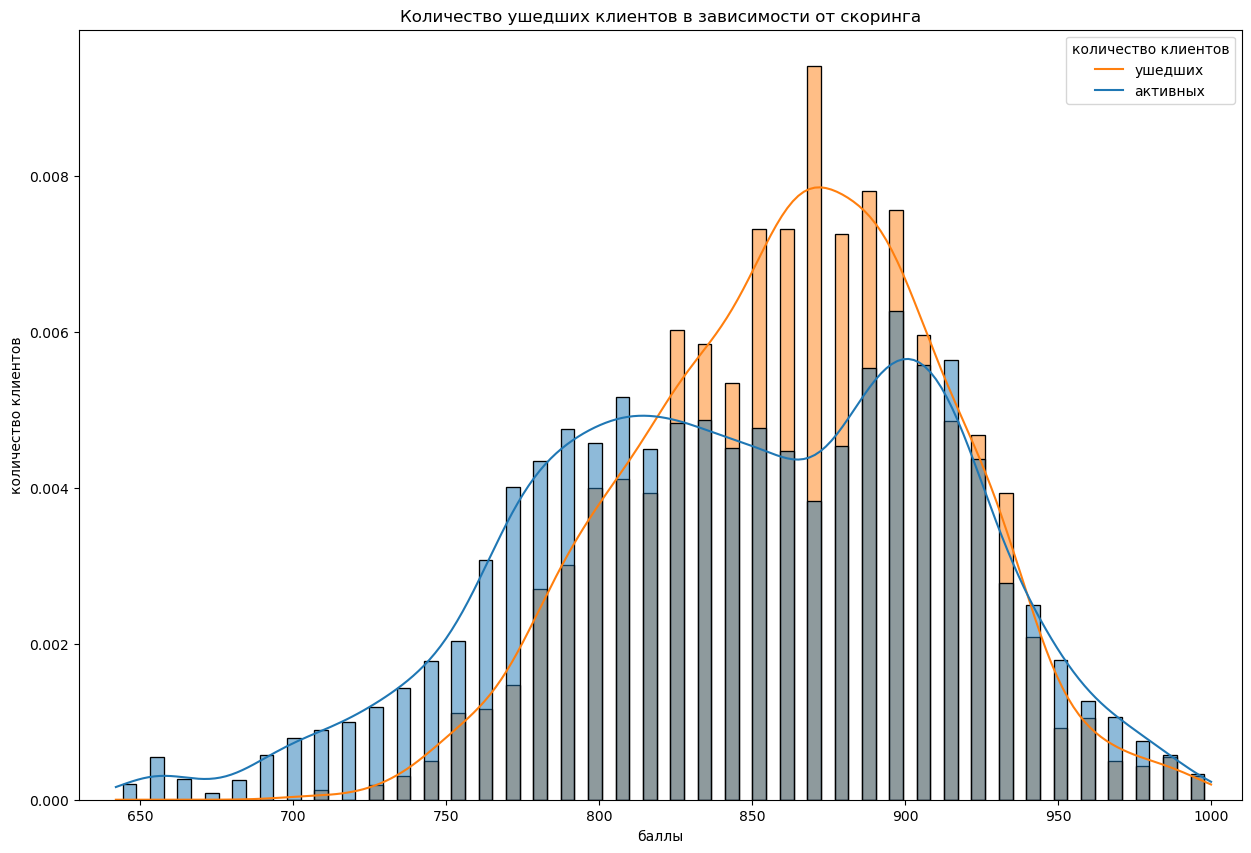

In [40]:
plt.figure(figsize=(15, 10))
sns.histplot(data, x='score',  hue='churn', element='bars', stat='density', common_norm=False,kde=True, shrink=0.5)
plt.title('Количество ушедших клиентов в зависимости от скоринга')
plt.xlabel('баллы')
plt.ylabel('количество клиентов')
plt.legend(['ушедших', 'активных'], title='количество клиентов', loc='upper right')
plt.xlim([630, 1010])
plt.show()

На графике видим высокое количество отточных клиентов с баллами от 850 до 900

In [41]:
def score_group(score):
    if 0 <= score < 700:
        return '640-700'
    if 700 <= score < 750:
        return '700-750'
    if 750 <= score < 800:
        return '750-800'
    if 800 <= score < 850:
        return '800-850'
    if 850 <= score < 900:
        return '850-900'
    if score >= 900:
        return '910-1000' 
    
data['score_group'] = data['score'].apply(score_group)

Группируем счет на сегменты с шагом в 50 баллов

In [42]:
score_impact = data.pivot_table(index = 'score_group', values = 'churn', aggfunc = ['sum', 'count'])
score_impact.columns = score_impact.columns.droplevel(level=1)
score_impact['%'] = score_impact['sum']/score_impact['count']*100
score_impact_sorted = score_impact.sort_values('%', ascending=False)
score_impact_sorted

,sum,count,%
score_group,,,
850-900,708,2640,26.818182
800-850,465,2423,19.191085
910-1000,437,2487,17.571371
750-800,190,1702,11.163337
700-750,18,504,3.571429
640-700,0,167,0.000000


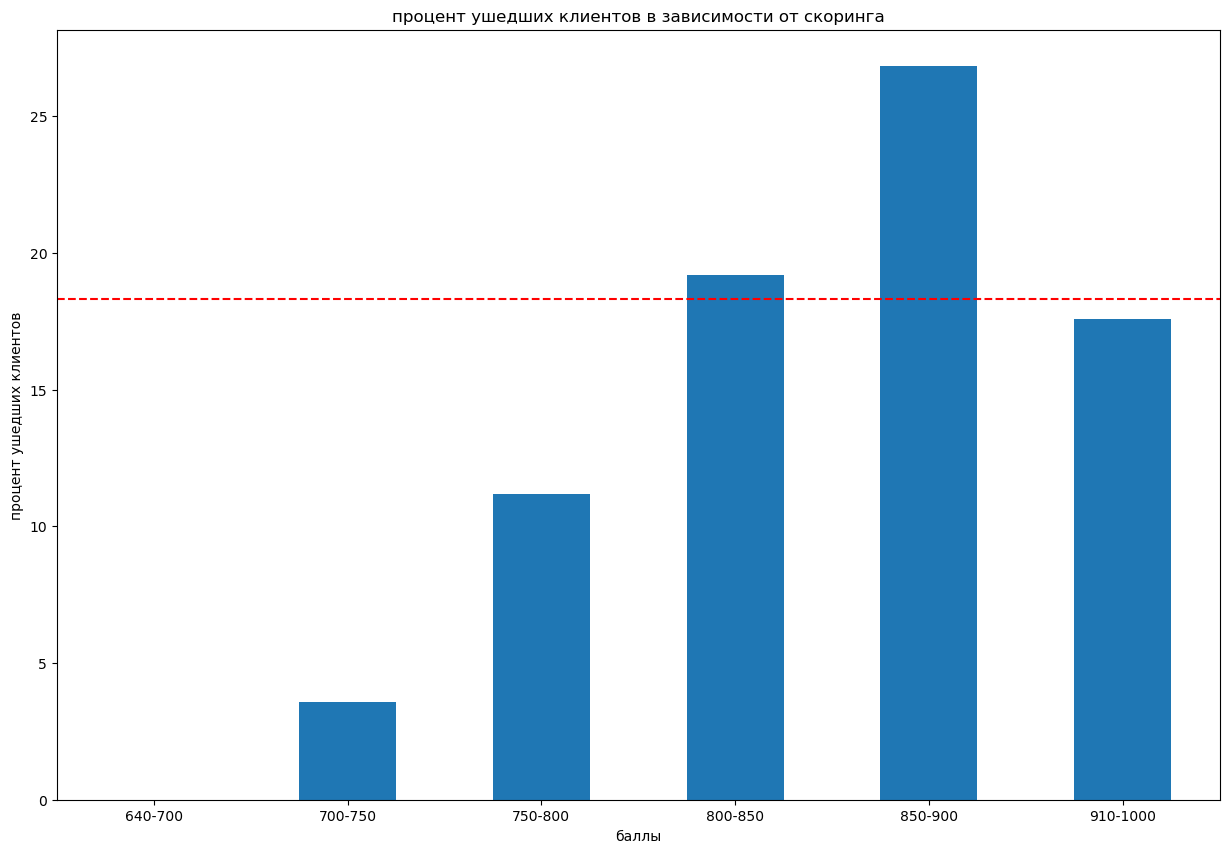

In [43]:
score_impact['%'].plot(kind = 'bar', figsize = (15,10), rot = 0,
                              title = 'процент ушедших клиентов в зависимости от скоринга',
                              xlabel = 'баллы', 
                              ylabel = 'процент ушедших клиентов'
                             )
plt.axhline (y=sum(score_impact['sum'])/sum(score_impact['count'])*100, color='red', linestyle='--')
plt.show()

На графике предположение подтверждается самый большой процент оттока в категории 850-900 баллов

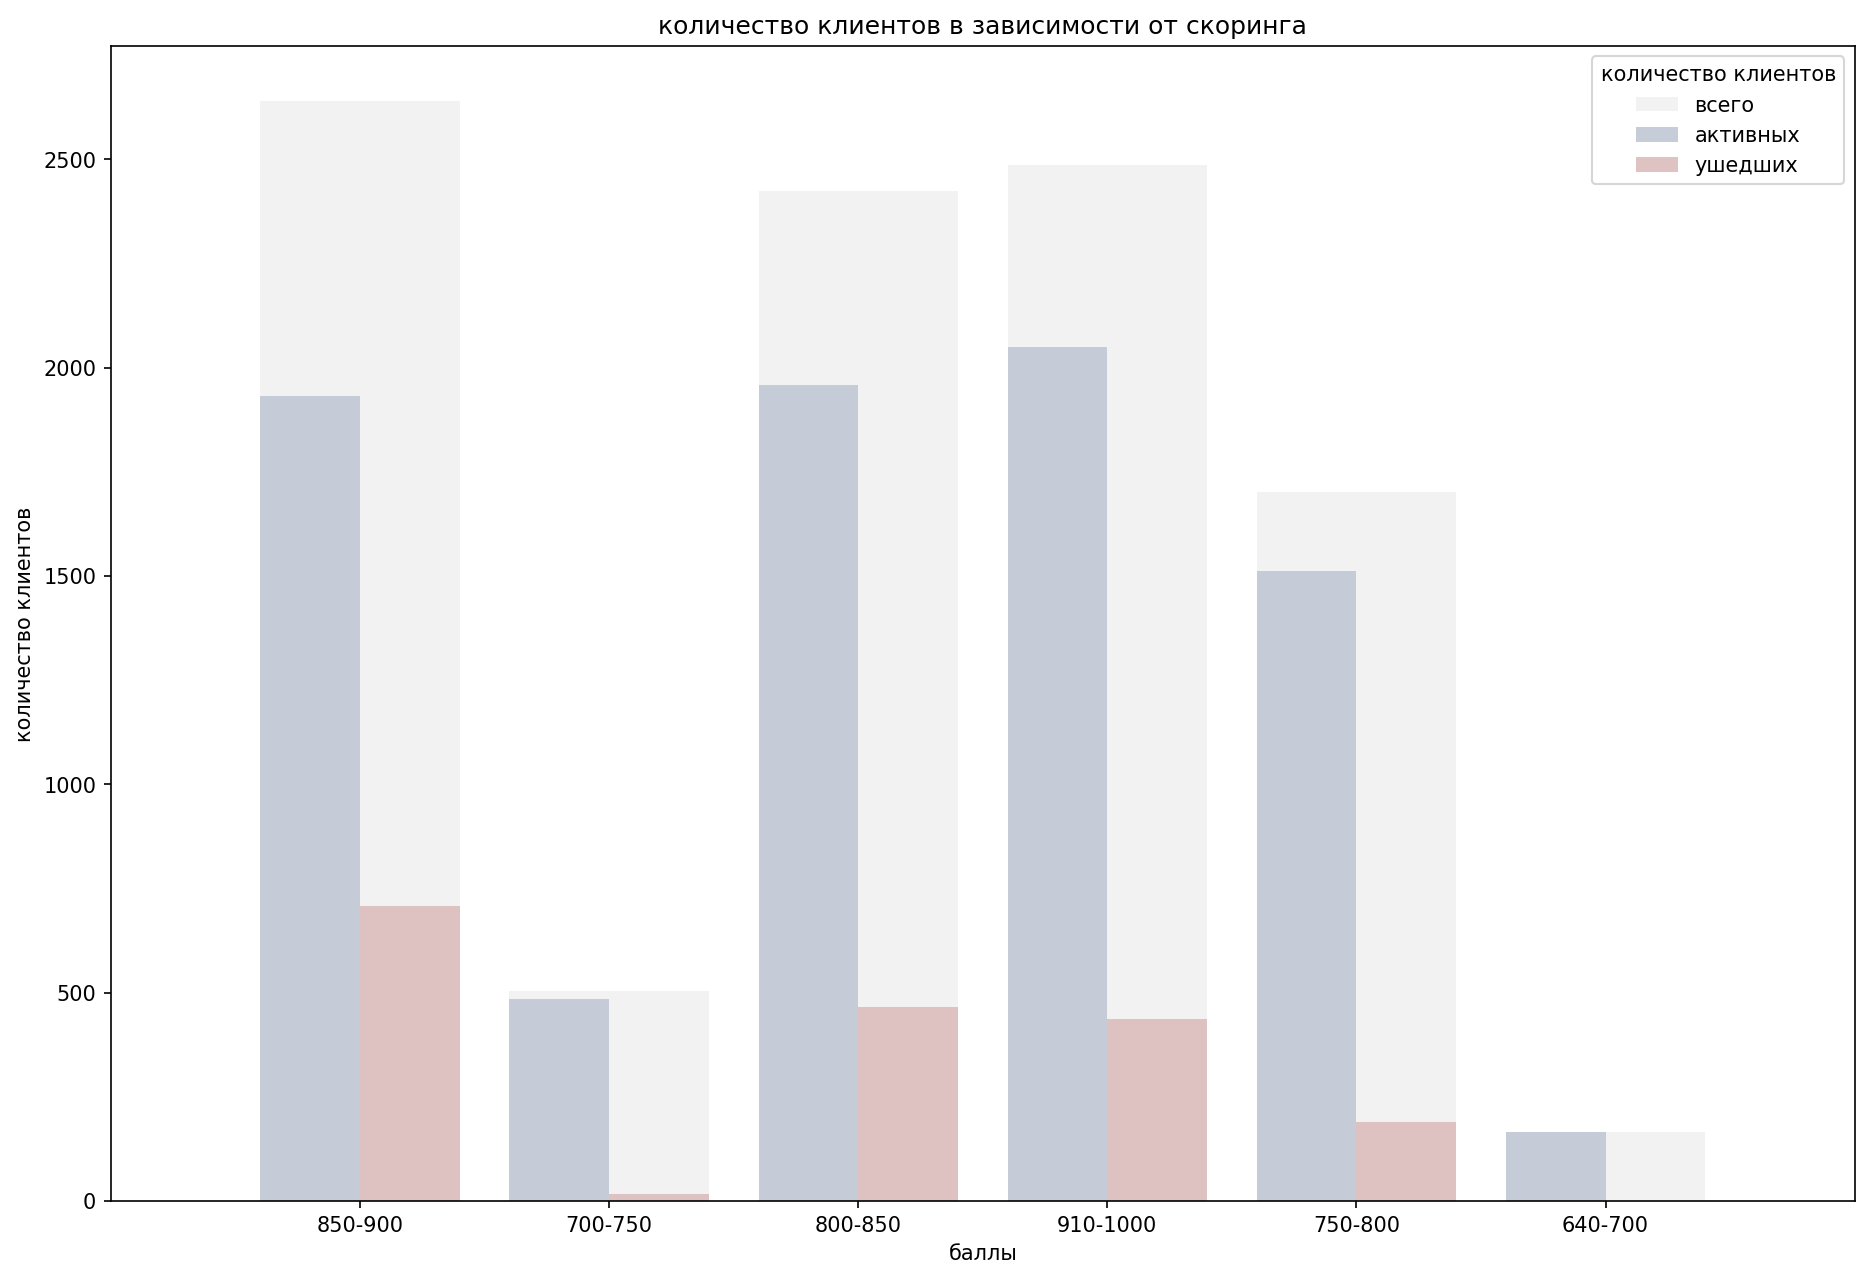

In [44]:
fig, ax = plt.subplots(figsize=(15,10), dpi=150)

sns.countplot(
            data=data,
            x='score_group',
            color='black',
            alpha=0.05
           )

sns.countplot(
            data=data,
            x='score_group',
            hue='churn',
            palette='vlag',
            alpha=0.9
           )

ax.set_title('количество клиентов в зависимости от скоринга')
ax.set_xlabel('баллы')
ax.set_ylabel('количество клиентов')
ax.set_xlim(-1,6)
ax.legend(['всего', 'активных', 'ушедших'], title='количество клиентов', loc='upper right')
plt.show()

Для сегментации предлагаю взять клиентов со скорингом от 800 до 900 баллов

### Влияние пола на уход клиентов

In [45]:
gender_impact = data.pivot_table(index = 'gender', values = 'churn', aggfunc = ['sum', 'count'])
gender_impact.columns = gender_impact.columns.droplevel(level=1)
gender_impact['%'] = gender_impact['sum']/gender_impact['count']*100
gender_impact_sorted = gender_impact.sort_values('%', ascending=False)
gender_impact_sorted

,sum,count,%
gender,,,
М,1183,4971,23.798029
Ж,635,4952,12.823102


Строю сводную таблицу по полу и далее уточняю графиком

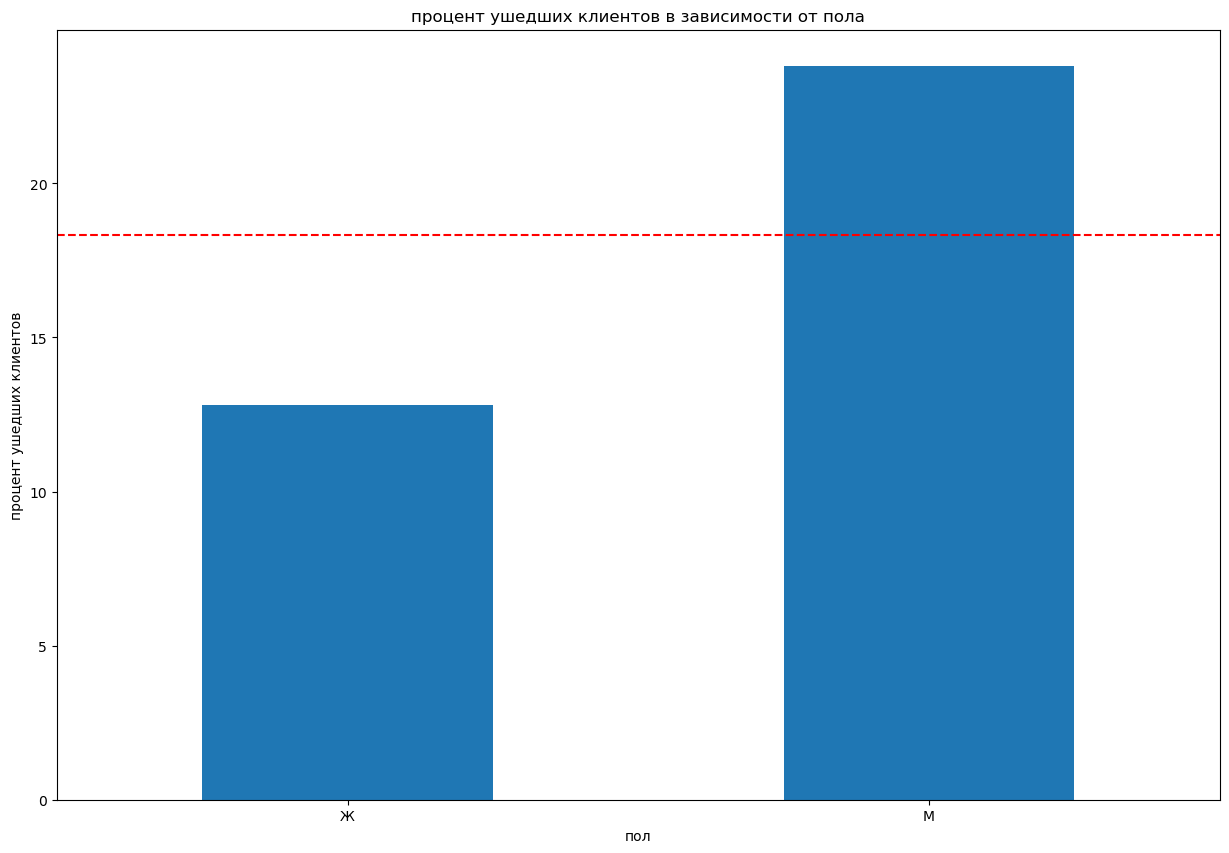

In [46]:
gender_impact['%'].plot(kind = 'bar', figsize = (15,10), rot = 0,
                               title = 'процент ушедших клиентов в зависимости от пола',
                               xlabel = 'пол', 
                               ylabel = 'процент ушедших клиентов'
                              )
plt.axhline (y=sum(gender_impact['sum'])/sum(gender_impact['count'])*100, color='red', linestyle='--')
plt.show()

Ушедших клиентов мужского пола значительно больше чем женщин

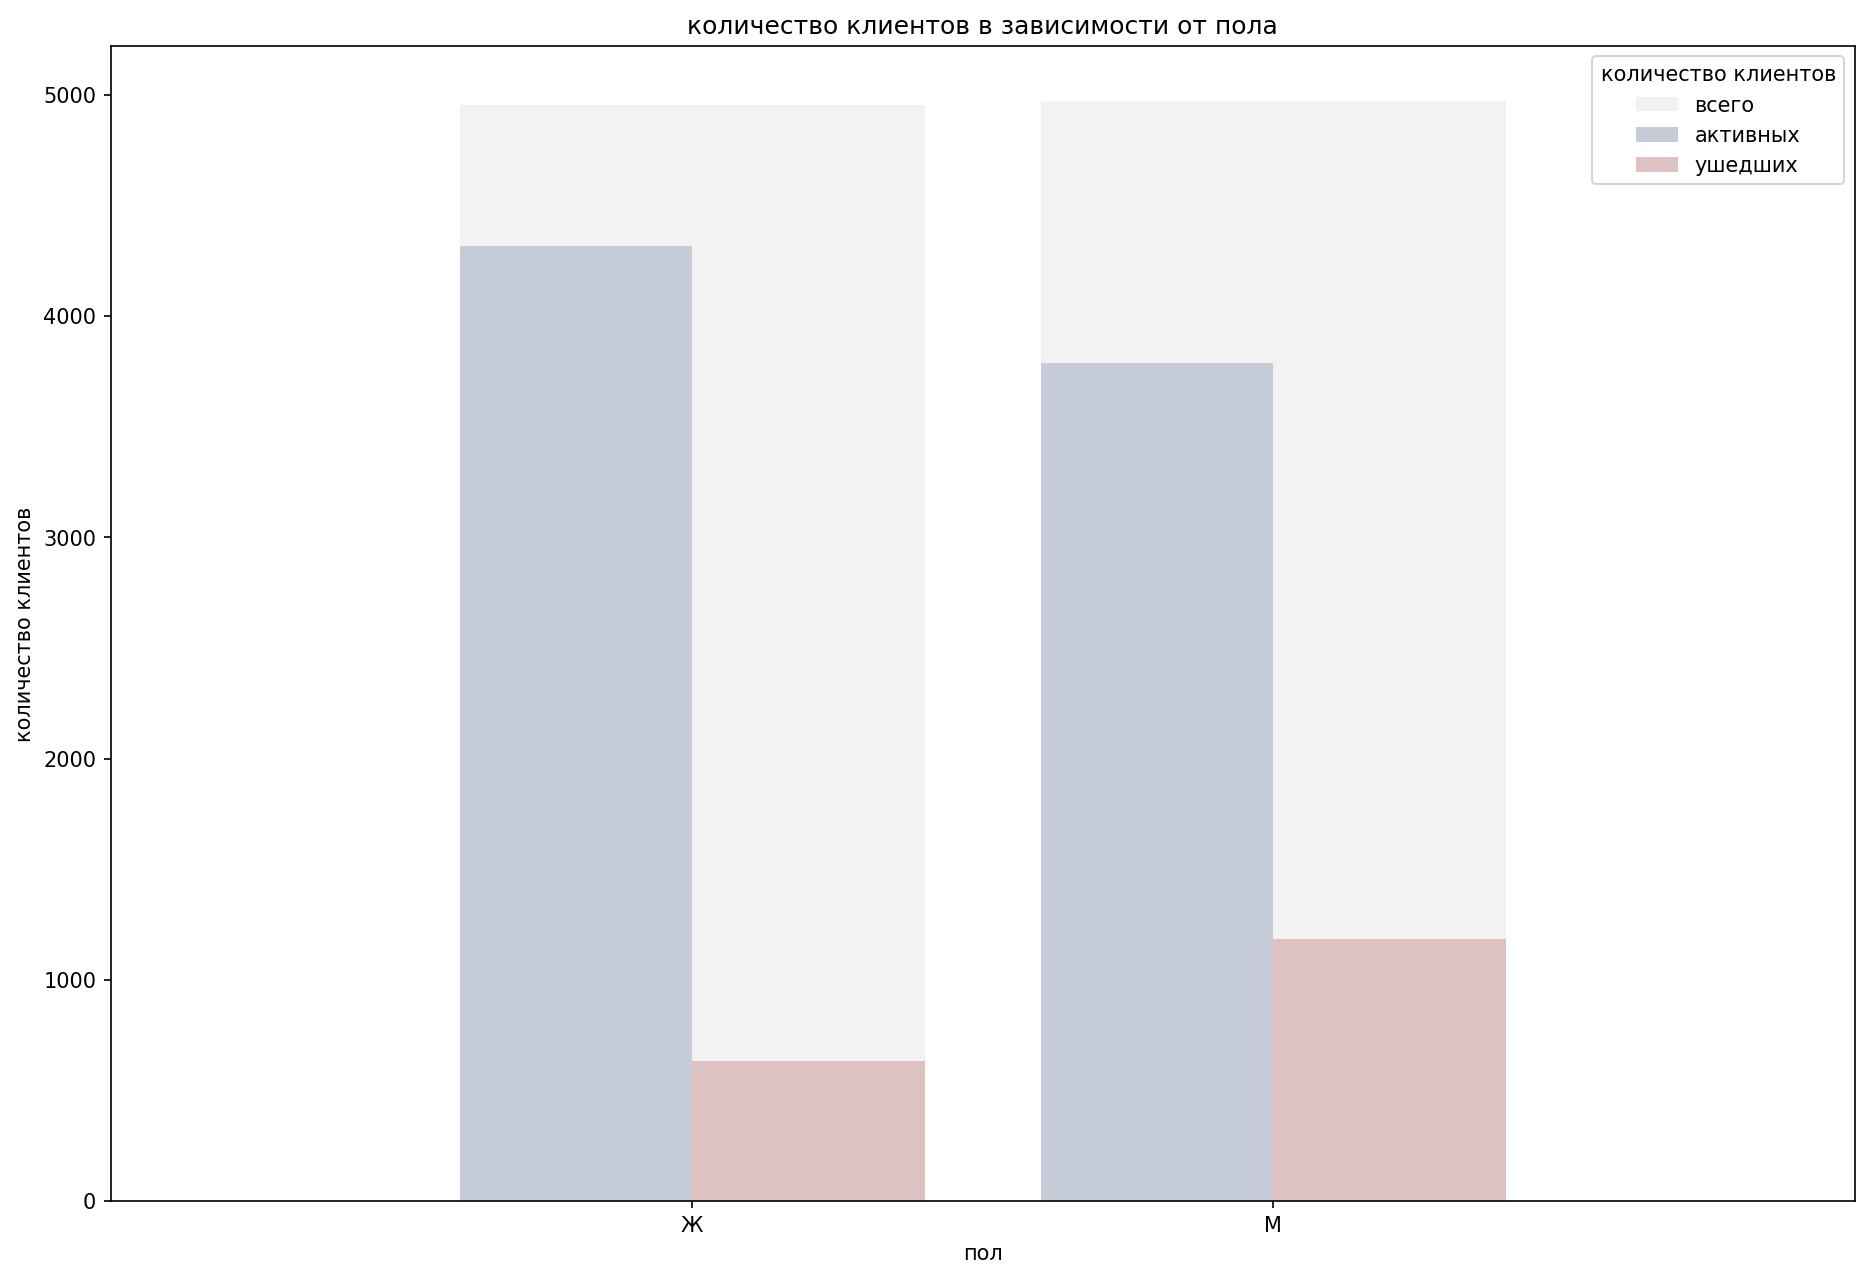

In [47]:
fig, ax = plt.subplots(figsize=(15,10), dpi=150)

sns.countplot(
            data=data,
            x='gender',
            color='black',
            alpha=0.05
           )

sns.countplot(
            data=data,
            x='gender',
            hue='churn',
            palette='vlag',
            alpha=0.9
           )

ax.set_title('количество клиентов в зависимости от пола')
ax.set_xlabel('пол')
ax.set_ylabel('количество клиентов')
ax.set_xlim(-1,2)
ax.legend(['всего', 'активных', 'ушедших'], title='количество клиентов', loc='upper right')
plt.show()

Для последующей сегментации выберу клиентов мужского пола

### Влияние последней активности на уход клиентов

In [48]:
last_activity_impact = data.pivot_table(index = 'last_activity', values = 'churn', aggfunc = ['sum', 'count'])
last_activity_impact.columns = last_activity_impact.columns.droplevel(level=1)
last_activity_impact['%'] = last_activity_impact['sum']/last_activity_impact['count']*100
last_activity_impact_sorted = last_activity_impact.sort_values('%', ascending=False)
last_activity_impact_sorted

,sum,count,%
last_activity,,,
1,1277,5194,24.586061
0,541,4729,11.440051


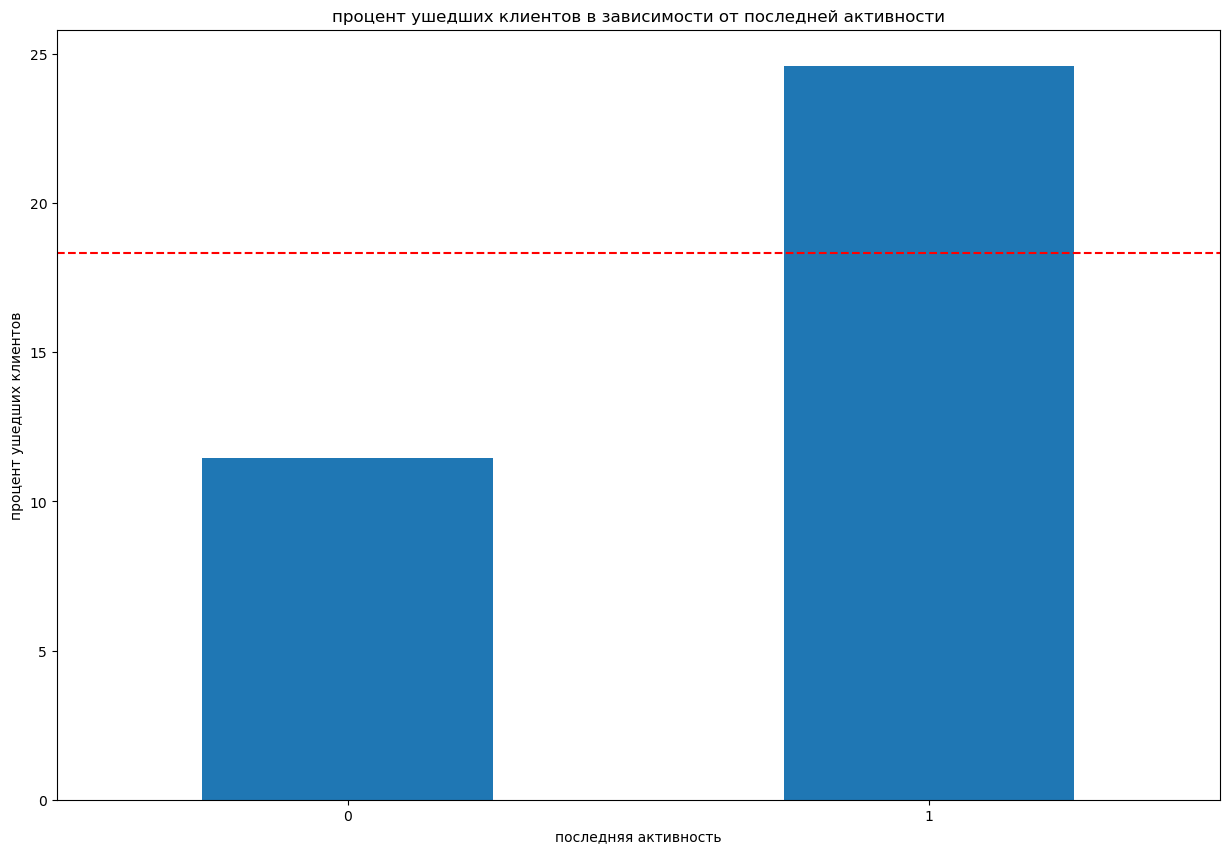

In [49]:
last_activity_impact['%'].plot(kind = 'bar', figsize = (15,10), rot = 0,
                                      title = 'процент ушедших клиентов в зависимости от последней активности',
                                      xlabel = 'последняя активность', 
                                      ylabel = 'процент ушедших клиентов'
                                     )
plt.axhline (y=sum(last_activity_impact['sum'])/sum(last_activity_impact['count'])*100, color='red', linestyle='--')
plt.show()

Наиболее активные пользователи чаще покидают банк

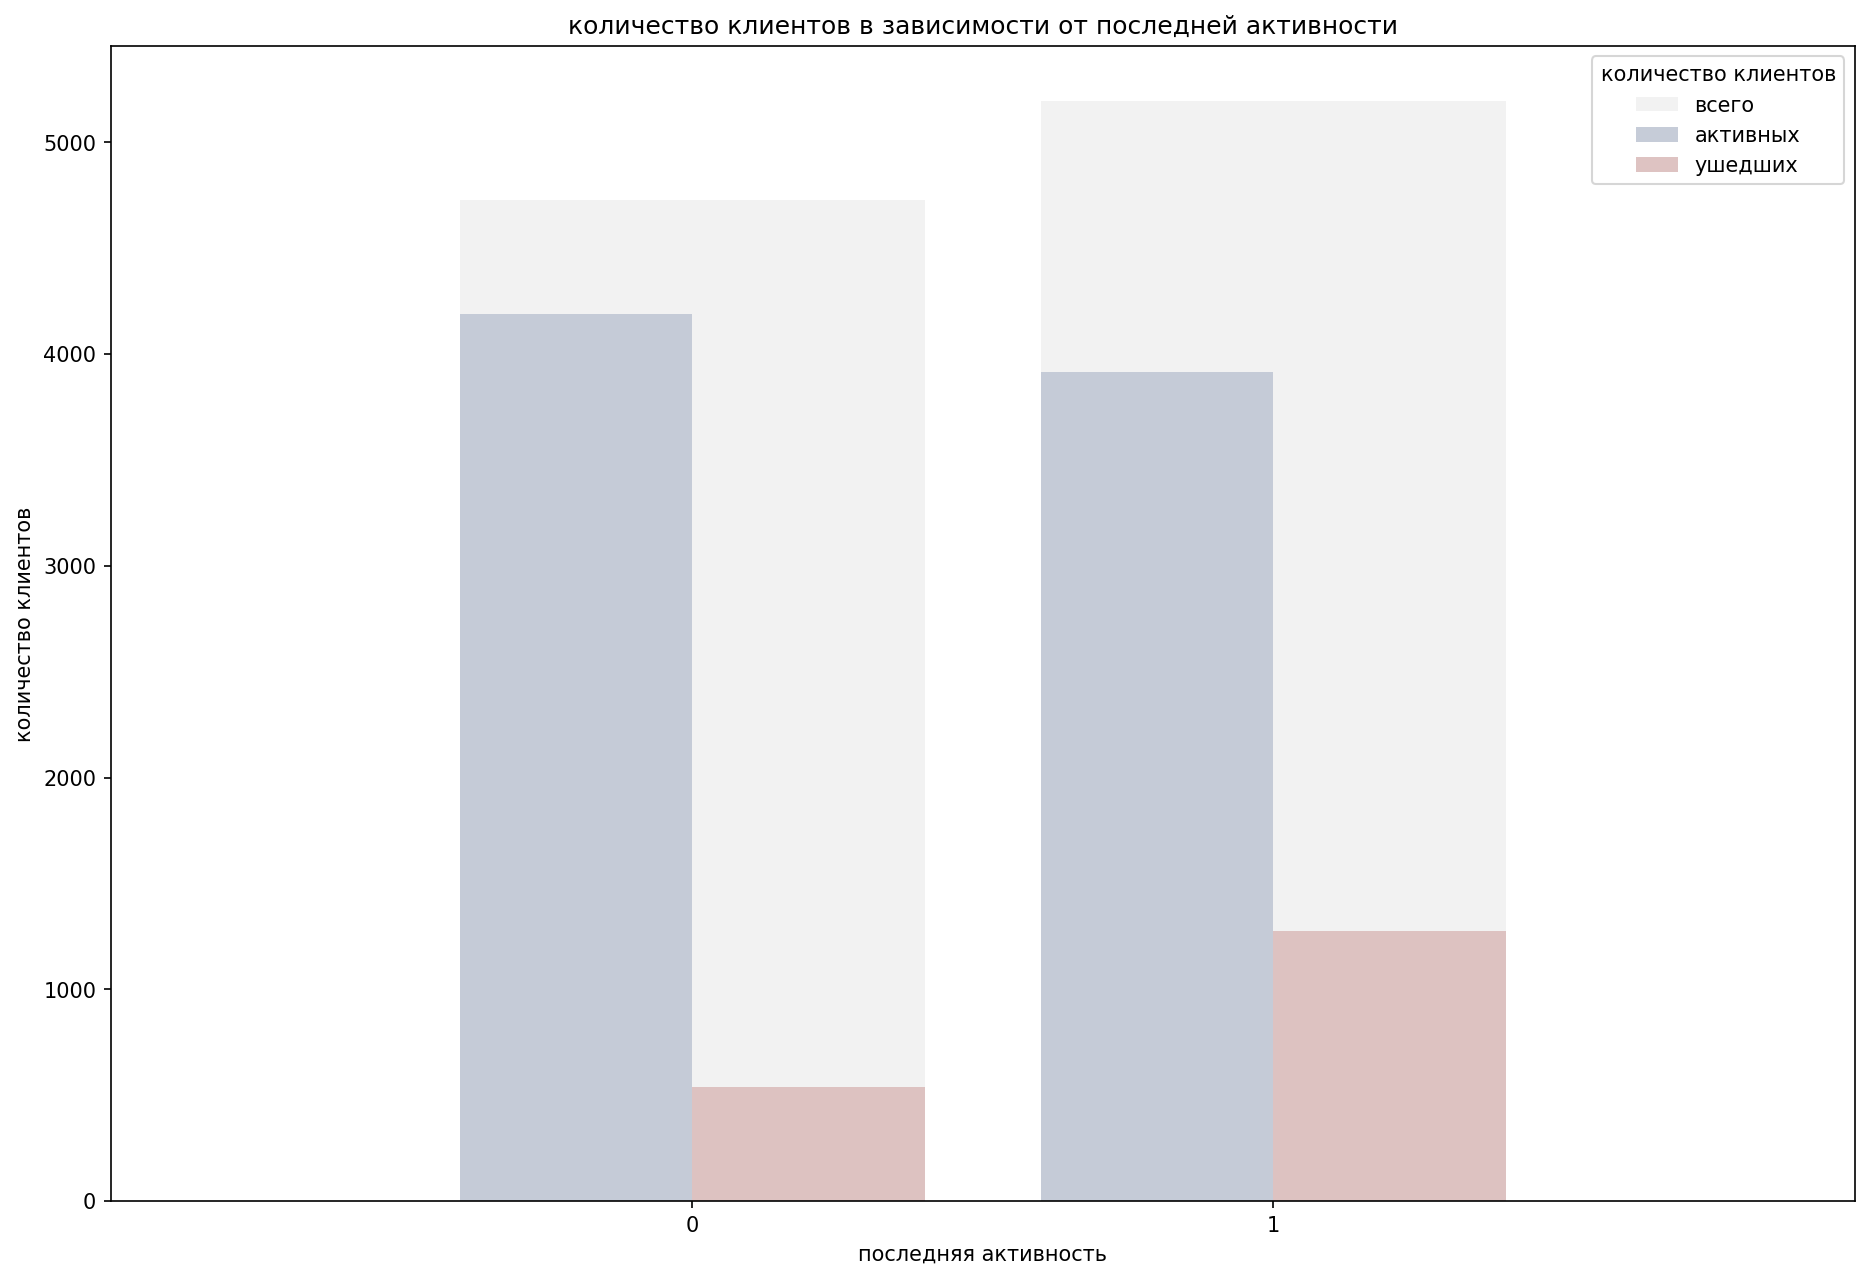

In [50]:
fig, ax = plt.subplots(figsize=(15,10), dpi=150)

sns.countplot(
            data=data,
            x='last_activity',
            color='black',
            alpha=0.05
           )

sns.countplot(
            data=data,
            x='last_activity',
            hue='churn',
            palette='vlag',
            alpha=0.9
           )

ax.set_title('количество клиентов в зависимости от последней активности')
ax.set_xlabel('последняя активность')
ax.set_ylabel('количество клиентов')
ax.set_xlim(-1,2)
ax.legend(['всего', 'активных', 'ушедших'], title='количество клиентов', loc='upper right')
plt.show()

Для сегментации отберем клиентов с последней активностью

### Влияние наличия кредитной карты на уход клиентов

In [51]:
credit_card_impact = data.pivot_table(index = 'credit_card', values = 'churn', aggfunc = ['sum', 'count'])
credit_card_impact.columns = credit_card_impact.columns.droplevel(level=1)
credit_card_impact['%'] = credit_card_impact['sum']/credit_card_impact['count']*100
credit_card_impact_sorted = credit_card_impact.sort_values('%', ascending=False)
credit_card_impact_sorted

,sum,count,%
credit_card,,,
0,815,3175,25.669291
1,1003,6748,14.863663


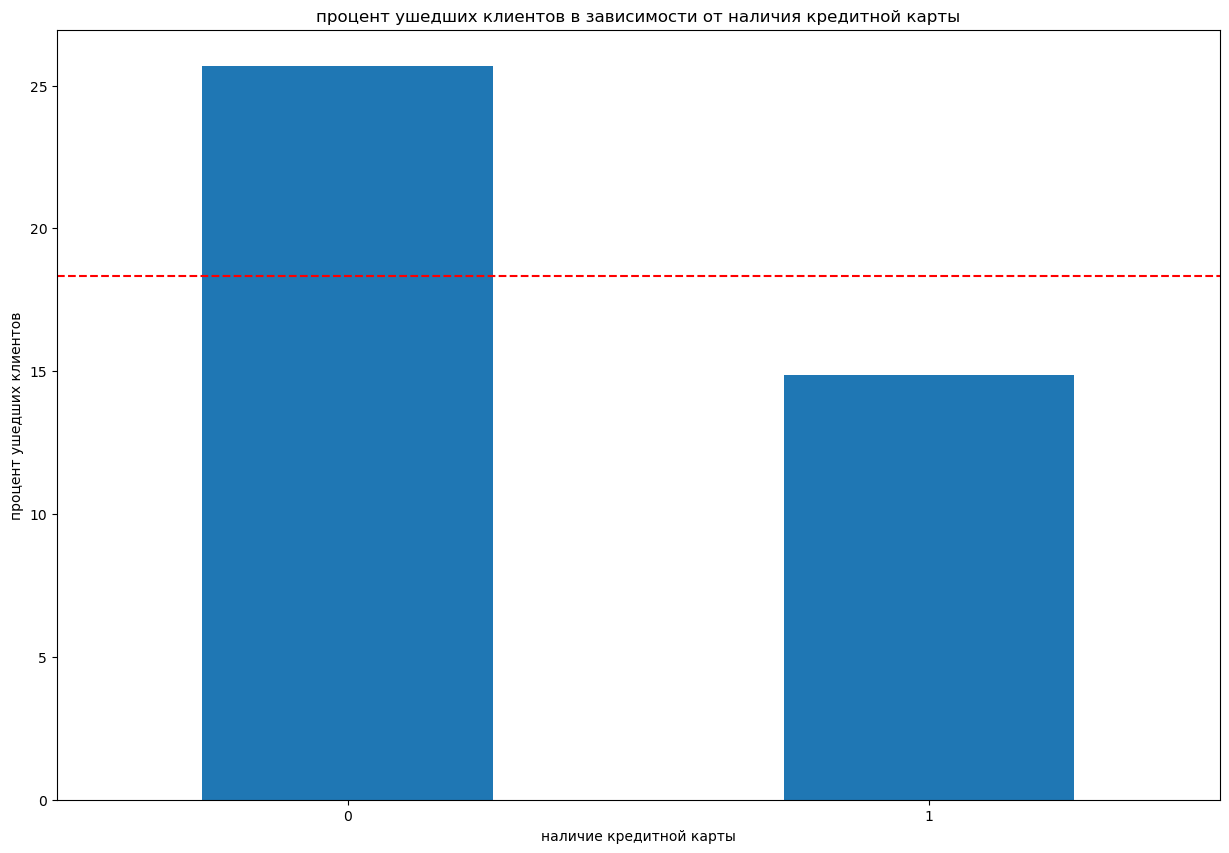

In [52]:
credit_card_impact['%'].plot(kind = 'bar', figsize = (15,10), rot = 0,
                                    title = 'процент ушедших клиентов в зависимости от наличия кредитной карты',
                                    xlabel = 'наличие кредитной карты', 
                                    ylabel = 'процент ушедших клиентов'
                                   )
plt.axhline (y=sum(credit_card_impact['sum'])/sum(credit_card_impact['count'])*100, color='red', linestyle='--')
plt.show()

Клиенты без кредитной карты более склонны к уходу

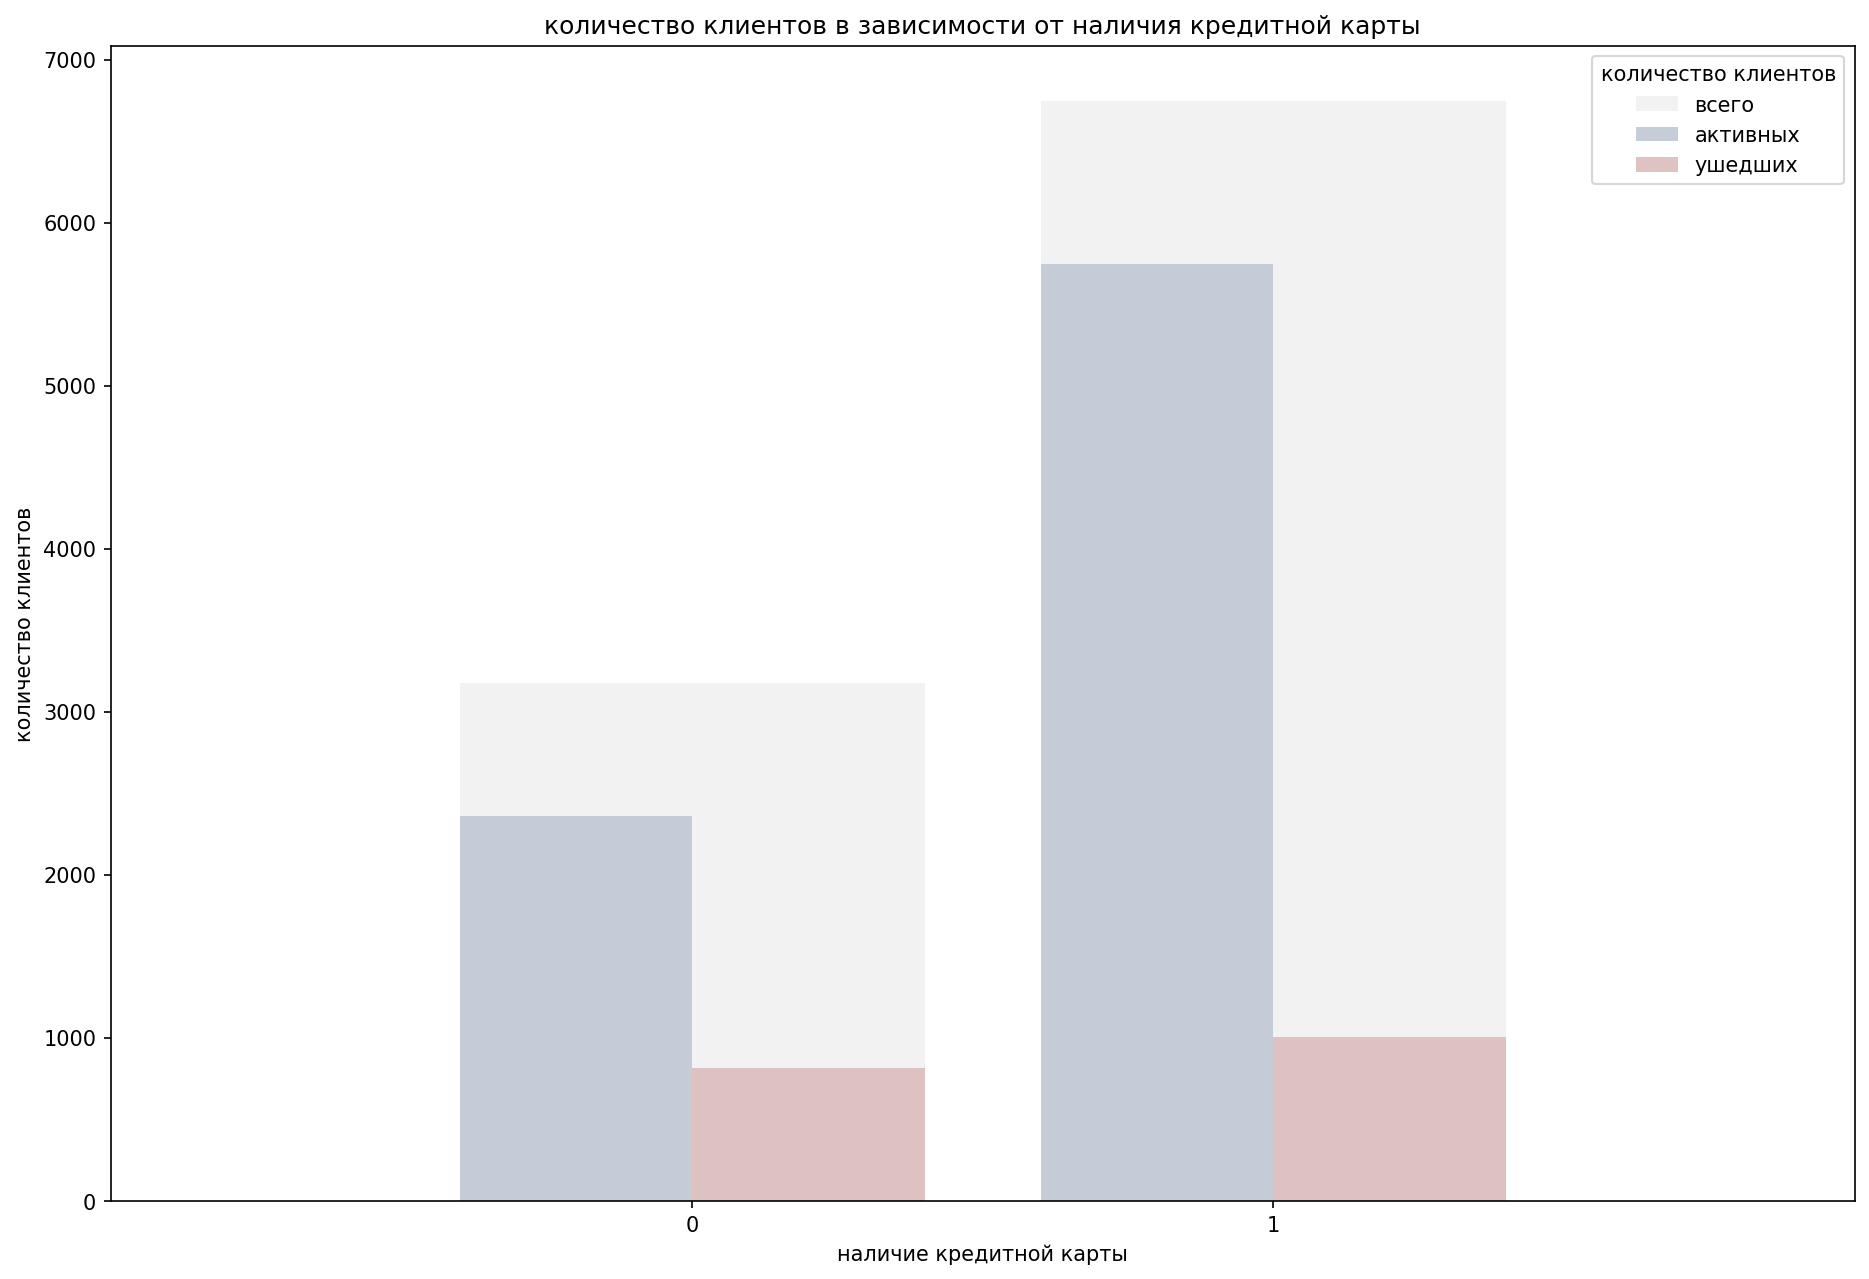

In [53]:
fig, ax = plt.subplots(figsize=(15,10), dpi=150)

sns.countplot(
            data=data,
            x='credit_card',
            color='black',
            alpha=0.05
           )

sns.countplot(
            data=data,
            x='credit_card',
            hue='churn',
            palette='vlag',
            alpha=0.9
           )

ax.set_title('количество клиентов в зависимости от наличия кредитной карты')
ax.set_xlabel('наличие кредитной карты')
ax.set_ylabel('количество клиентов')
ax.set_xlim(-1,2)
ax.legend(['всего', 'активных', 'ушедших'], title='количество клиентов', loc='upper right')
plt.show()

Не смотря на то что количество ушедших клиентов сопоставимо в обоих случаях, для сегментации отберем клиентов без кредитной карты

### Влияние города на уход клиентов

In [54]:
city_impact = data.pivot_table(index = 'city', values = 'churn', aggfunc = ['sum', 'count'])
city_impact.columns = city_impact.columns.droplevel(level=1)
city_impact['%'] = city_impact['sum']/city_impact['count']*100
city_impact_sorted = city_impact.sort_values('%', ascending=False)
city_impact_sorted

,sum,count,%
city,,,
Ярославль,1117,5854,19.080970
Ростов,265,1416,18.714689
Рыбинск,436,2653,16.434225


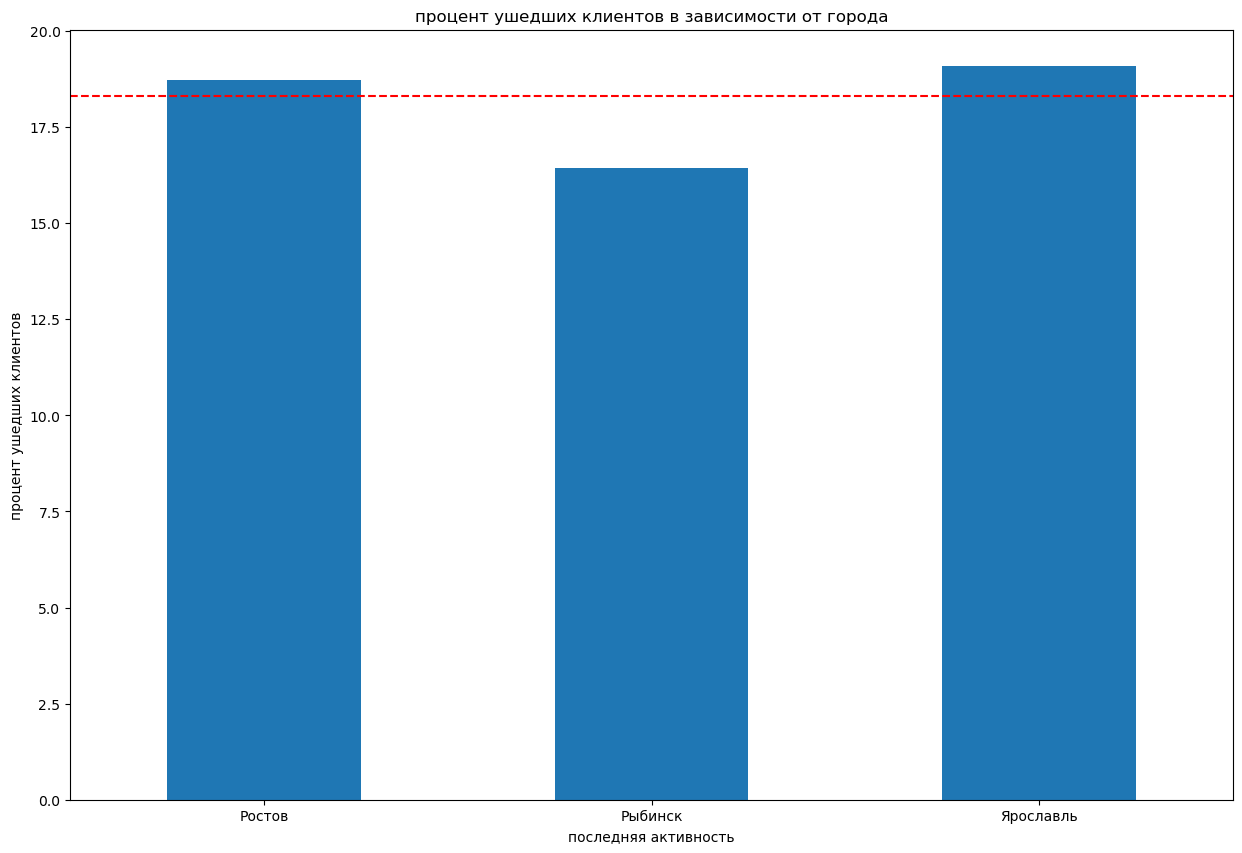

In [55]:
city_impact['%'].plot(kind = 'bar', figsize = (15,10), rot = 0,
                             title = 'процент ушедших клиентов в зависимости от города',
                             xlabel = 'последняя активность', 
                             ylabel = 'процент ушедших клиентов'
                            )
plt.axhline (y=sum(city_impact['sum'])/sum(city_impact['count'])*100, color='red', linestyle='--')
plt.show()

Больше всего ушедших клиентов в ярославле, но и в остальных городах процентное соотношение не сильно отличается

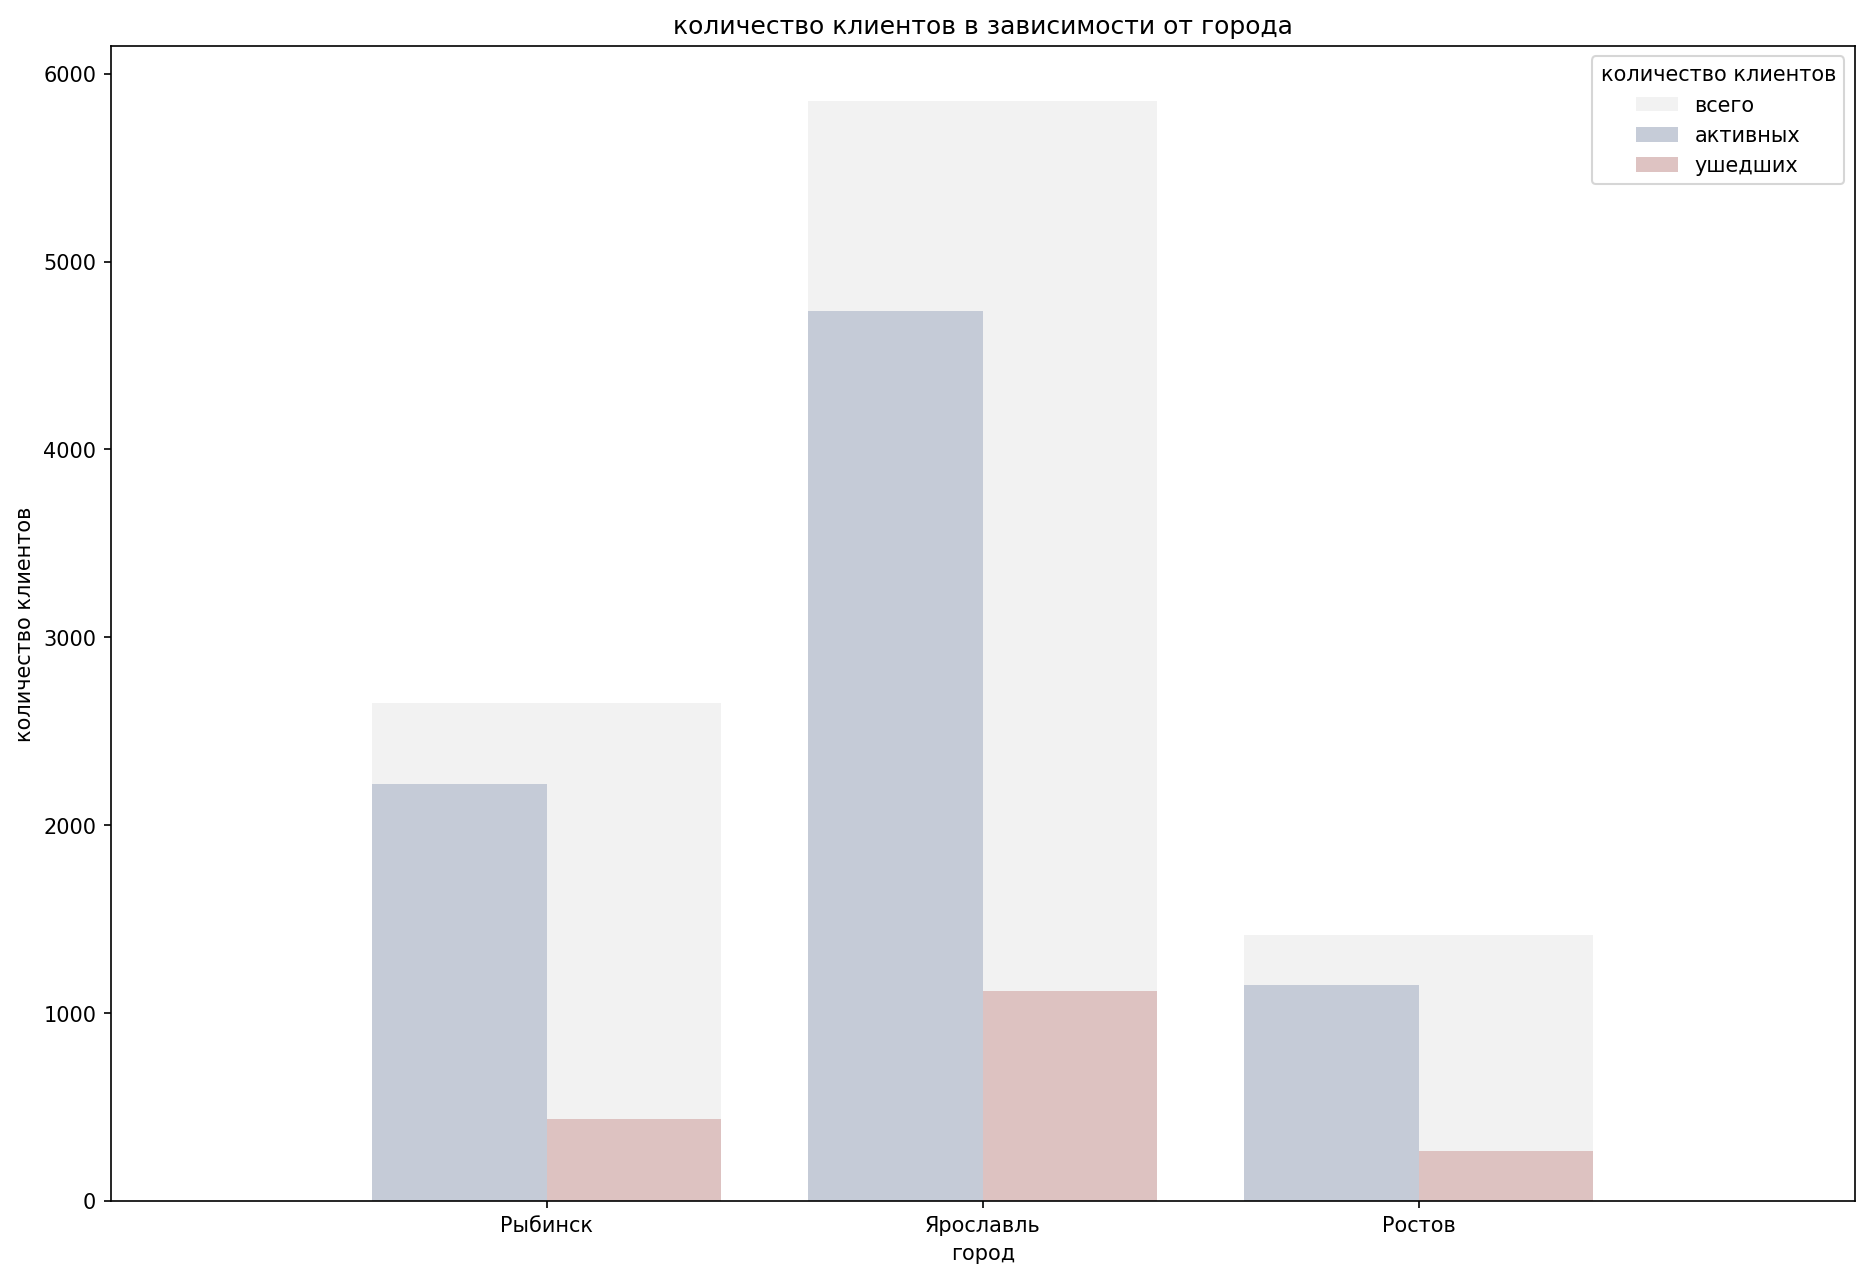

In [56]:
fig, ax = plt.subplots(figsize=(15,10), dpi=150)

sns.countplot(
            data=data,
            x='city',
            color='black',
            alpha=0.05
           )

sns.countplot(
            data=data,
            x='city',
            hue='churn',
            palette='vlag',
            alpha=0.9
           )

ax.set_title('количество клиентов в зависимости от города')
ax.set_xlabel('город')
ax.set_ylabel('количество клиентов')
ax.set_xlim(-1,3)
ax.legend(['всего', 'активных', 'ушедших'], title='количество клиентов', loc='upper right')
plt.show()

На графике видим причину, почему отточных клиентов из Ярославля больше, это связано с тем, что общее количество клиентов из этого города почти в 2 раза привышает количество клиентов из сопоставляемых городов. Согласно матрице корреляции города не имеют большой значимости при сравнении по churn, поэтому предлагаю не выделять конкретные города

### Промежуточный вывод

Предлагаю обьеденить значимость показателей в один список по убыванию:
- equity
- products
- balance
- last_activity
- gender
- score
- credit_card
- est_salary
- age
- city

Уточним признаки отточности согласно их значимости по убыванию:

1.equity оценка собственности должна быть больше четырех

2.products количество продуктов должнобыть 3-4 , так же подойдут 5 и 0 но таких клиентов мало

3.balance балансы свыше миллиона подвержены повышенному оттоку

4.last_activity активные пользователи склонны к уходу

5.gender среди мужчин больше отточных клиентов

6.score клиенты со скоринговым рейтингом от 800 до 900 баллов покидают бан чаще остальных

7.credit_card отсутствие кредитной карты повышает вероятность ухода клиента

8.est_salary клиенты с зарплатой 100-200 и 400-600 тысяч уходят чаще

9.age клиенты среди групп 25-35, 45-55, 55-65 лет покидают банк чаще остальных

10.city большинство ушедших клиентов из Ярославля

## Проверка статистических гипотез

H0: Средний доход клиентов, которые ушли, равен среднему доходу клиентов, которые остались.

H1: Средний доход клиентов, которые ушли, не равен среднему доходу клиентов, которые остались.

In [57]:
left = data.query('churn == 0')['est_salary']
stayed = data.query('churn == 1')['est_salary']

alpha = 0.01 #0.05

results = st.ttest_ind(left, stayed)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.8749429961814755
Не получилось отвергнуть нулевую гипотезу


Данные не имеют нормального распределения поэтому корректнее будет применить u-критерий

In [58]:
stat, p = st.mannwhitneyu(left, stayed)
print('statistics=%.3f, pvalue=%.3f' % (stat, p))

alpha = 0.01

if p > alpha:
    print('Не получилось отвергнуть нулевую гипотезу')
else:
    print('Отвергаем нулевую гипотезу')

statistics=6957361.000, pvalue=0.000
Отвергаем нулевую гипотезу


H0: Средняя оценка собственности клиентов, которые ушли, равна средней оценке собственности клиентов, которые остались.

H1: Средняя оценка собственности клиентов, которые ушли, не равна средней оценке собственности клиентов, которые остались.

In [59]:
left = data.query('churn == 0')['equity']
stayed = data.query('churn == 1')['equity']

alpha = 0.01 #0.05

results = st.ttest_ind(left, stayed)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.7009933595493374e-165
Отвергаем нулевую гипотезу


In [60]:
stat, p = st.mannwhitneyu(left, stayed)
print('statistics=%.3f, pvalue=%.3f' % (stat, p))

alpha = 0.01

if p > alpha:
    print('Не получилось отвергнуть нулевую гипотезу')
else:
    print('Отвергаем нулевую гипотезу')

statistics=4477929.000, pvalue=0.000
Отвергаем нулевую гипотезу


H0: Среднее количество используемых банковских продуктов клиентов, которые ушли, равно среднему количеству используемых банковских продуктов клиентов, которые остались.

H1: Среднее количество используемых банковских продуктов клиентов, которые ушли, не равно среднему количеству используемых банковских продуктов клиентов, которые остались.

In [61]:
left = data.query('churn == 0')['products']
stayed = data.query('churn == 1')['products']

alpha = 0.01 #0.05

results = st.ttest_ind(left, stayed)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 2.9766822314907055e-208
Отвергаем нулевую гипотезу


In [62]:
stat, p = st.mannwhitneyu(left, stayed)
print('statistics=%.3f, pvalue=%.3f' % (stat, p))

alpha = 0.01

if p > alpha:
    print('Не получилось отвергнуть нулевую гипотезу')
else:
    print('Отвергаем нулевую гипотезу')

statistics=4646962.500, pvalue=0.000
Отвергаем нулевую гипотезу


H0: Средний возраст клиентов, которые ушли, равен среднему возрасту клиентов, которые остались.

H1: Средний возраст клиентов, которые ушли, не равен среднему возрасту клиентов, которые остались.

In [63]:
left = data.query('churn == 0')['age']
stayed = data.query('churn == 1')['age']

alpha = 0.01 #0.05

results = st.ttest_ind(left, stayed)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 5.043792546995984e-07
Отвергаем нулевую гипотезу


In [64]:
stat, p = st.mannwhitneyu(left, stayed)
print('statistics=%.3f, pvalue=%.3f' % (stat, p))

alpha = 0.01

if p > alpha:
    print('Не получилось отвергнуть нулевую гипотезу')
else:
    print('Отвергаем нулевую гипотезу')

statistics=7875562.000, pvalue=0.000
Отвергаем нулевую гипотезу


## Сегментация на основе стратегических показателей

### Признаки отточности:

количество баллов собственности: 4 и выше

количество продуктов, которыми пользуется клиент: 0, 3, 4, 5

баланс на счёте: 1-2M и больше

последняя активность: да

пол: мужской

баллы кредитного скоринга: 800-900

есть ли кредитная карта: нет

заработная плата клиента: 100-200K, 400-600k

возраст: 25-35, 45-55, 55-65 лет 

город: любой

### Сегмент 1

Продуктов больше 3 и оценка собственности больше 3

In [65]:
data.query('products > 3 & equity > 3').agg(
    {'churn':'mean', 
     'user_id':'count', 
     'equity':'mean', 
     'products':'mean', 
     'score':'mean', 
    }
)

churn         0.623955
user_id     359.000000
equity        4.835655
products      4.033426
score       885.116992
dtype: float64

Доля отточных клиентов: 62%

Количество киентов: 359

Среднее количество баллов собственности: 4

Среднее количество используемых продуктов: 4

Средние баллы кредитного скоринга: 885

### Сегмент 2

Возраст от 25 до 35 и баланс больше 1000000

In [66]:
data.query('25<=age<=35 & equity >= 3 & balance > 1000000').agg(
    {'churn':'mean', 
     'user_id':'count', 
     'equity':'mean', 
     'products':'mean', 
     'score':'mean', 
     }
)

churn         0.567416
user_id     356.000000
equity        4.415730
products      2.384831
score       896.429775
dtype: float64

Доля отточных клиентов: 56%

Количество киентов: 356

Среднее количество баллов собственности: 4

Среднее количество используемых продуктов: 2

Средние баллы кредитного скоринга: 896

### Сегмент 3

Клиент с баллами собственности 4 или больше ,количеством продуктов 3 или больше и баланс больше или равен 80000

In [67]:
data.query('equity >= 4 & products >= 3 & balance >= 800000').agg(
    {'churn':'mean', 
     'user_id':'count', 
     'equity':'mean', 
     'products':'mean', 
     'score':'mean', 
    }
)

churn         0.557692
user_id     520.000000
equity        4.709615
products      3.401923
score       879.413462
dtype: float64

Доля отточных клиентов: 55%

Количество киентов: 520

Среднее количество баллов собственности: 4

Среднее количество используемых продуктов: 3

Средние баллы кредитного скоринга: 879

### Сегмент 4

Клиент с баллами собственности 4 или больше, количеством продуктов 3 или больше и активен в последнее время

In [68]:
data.query('equity >= 3 & products >= 3 & last_activity == 1').agg(
    {'churn':'mean', 
     'user_id':'count', 
     'equity':'mean', 
     'products':'mean', 
     'score':'mean', 
    }
)

churn         0.507396
user_id     676.000000
equity        4.380178
products      3.517751
score       860.502959
dtype: float64

Доля отточных клиентов: 50%

Количество киентов: 676

Среднее количество баллов собственности: 4

Среднее количество используемых продуктов: 3

Средние баллы кредитного скоринга: 860

In [2]:
df=data
qrys = (
    'products >= 3 & Мужчина == 1',
    'equity >= 3 & products >= 3 & last_activity == 1',
    'equity >= 4 & products >= 3 & balance >= 800000',
    'Мужчина == 1 & credit_card == 0 & last_activity == 1',
    'Мужчина == 1 & 100000<=est_salary<=200000 & last_activity == 1 & equity >= 3',
    '25<=age<=35 & equity >= 3 & balance > 1000000',
    '26<=age<=37 & products >= 3',
    'Мужчина == 1 & 800<=score<=900 & credit_card == 0',
    'products > 3 & equity > 3'
)

df_results = pd.concat([
    pd.DataFrame(df.query(q).agg({"churn":['mean','count']}).values,
                 columns=[q],
                 index=['Отток','Размер']).T 
    for q in qrys])

display(df_results.style.format("{:.1%}",subset=["Отток"])\
                   .format("{:_.0f}",subset=["Размер"]))
    
all_catched = pd.concat([df.query(q) for q in qrys])
all_churn = df.churn.sum()
catched = all_catched.drop_duplicates().churn.sum()
share_catched = catched / all_churn

ok = True
if len(qrys) != 3:
    ok = False
    print('\033[93m\033[1mРезультаты некорректны, нужно 3 лучших сегмента\033[0m')
    
if df_results['Отток'].min() < df.churn.mean() * 1.5:
    ok = False
    print('\033[93m\033[1mНужно изменить сегменты: присутствуют недостаточно отточные\033[0m')
elif df_results['Отток'].min() < df.churn.mean() * 2:
    print('Часть сегментов не высокоотточна')
elif df_results['Отток'].max() > df.churn.mean() * 3:
    print('Нашли очень отточный сегмент')

if df_results['Размер'].min() < 300:
    ok = False
    print('\033[93m\033[1mНужно изменить сегменты: присутствуют слишком мелкие сегменты\033[0m')
    
if all_catched.shape[0] > 5000:
    ok = False
    print("\033[93m\033[1mОтдел маркетинга не сможет обработать такое количество клиентов\033[0m")
elif all_catched.shape[0] > 3000:
    print("Отделу маркетинга будет сложно обработать такое количество клиентов, его эффективность снизится")
elif all_catched.shape[0] < 1000:
    print("Сегменты можно увеличить")

text_churn = f"{catched}/{all_churn} = {share_catched:.1%}"
if share_catched < 1/3:
    print(f"\033[93m\033[1mВ сегменты попало недостаточное число отточных: {text_churn}\033[0m")
elif ok:
    if 1/2 < share_catched < 2/3:
        print(f"Хороший результат, в сегменты попало: {text_churn}")
    elif share_catched >= 2/3:
        print(f"Прекрасный результат, в сегменты попало: {text_churn}")
    else:
        print(f"В сегменты попало: {text_churn}")
else:
    print(f"В сегменты попало: {text_churn}")

NameError: name 'data' is not defined

## Выводы и рекомендации для заказчика

В ходе выполнения данной исследовательской работы были определены признаки отточности

Значимые признаки отточности в убывающем порядке:
- equity
- products
- balance
- last_activity
- gender
- score
- credit_card
- est_salary
- age
- city

1.equity оценка собственности должна быть больше четырех

2.products количество продуктов должнобыть 3-4 , так же подойдут 5 и 0 но таких клиентов мало

3.balance балансы свыше миллиона подвержены повышенному оттоку

4.last_activity активные пользователи склонны к уходу

5.gender среди мужчин больше отточных клиентов

6.score клиенты со скоринговым рейтингом от 800 до 900 баллов покидают бан чаще остальных

7.credit_card отсутствие кредитной карты повышает вероятность ухода клиента

8.est_salary клиенты с зарплатой 100-200 и 400-600 тысяч уходят чаще

9.age клиенты среди групп 25-35, 45-55, 55-65 лет покидают банк чаще остальных

10.city большинство ушедших клиентов из Ярославля

Сформулированы статистические гипотезы о различии доходов и оценке собственности, среди ушедших и оставшихся клиентов.

СФормированы сегменты отточных клиентов:

- Сегмент 1

Продуктов больше 3 и оценка собственности больше 3

Доля отточных клиентов: 62%
Количество киентов: 359
Среднее количество баллов собственности: 4
Среднее количество используемых продуктов: 4
Средние баллы кредитного скоринга: 885

- Сегмент 2

Возраст от 25 до 35 и баланс больше 1000000

Доля отточных клиентов: 56%
Количество киентов: 356
Среднее количество баллов собственности: 4
Среднее количество используемых продуктов: 2
Средние баллы кредитного скоринга: 896

- Сегмент 3

Клиент с баллами собственности 4 или больше ,количеством продуктов 3 или больше и баланс больше или равен 80000

Доля отточных клиентов: 55%
Количество киентов: 520
Среднее количество баллов собственности: 4
Среднее количество используемых продуктов: 3
Средние баллы кредитного скоринга: 879

- Сегмент 4

Клиент с баллами собственности 4 или больше, количеством продуктов 3 или больше и активен в последнее время

Доля отточных клиентов: 50%
Количество киентов: 676
Среднее количество баллов собственности: 4
Среднее количество используемых продуктов: 3
Средние баллы кредитного скоринга: 860

Рекомендации:

- Сегмент 1

1.Предложить поучаствовать в программе лояльности

2.Улучшить качество предлагаемых продуктов

3.Улучшение обратной связи с клиентами

4.Агрегация сервисов

- Сегмент 2

1.Предложить поучаствовать в программе лояльности

2.Улучшить качество предлагаемых продуктов

3.Улучшение обратной связи с клиентами

4.Агрегация сервисов

5.Выпуск зарплатных карт

- Сегмент 3

1.Предложить поучаствовать в программе лояльности

2.Улучшить качество предлагаемых продуктов

3.Улучшение обратной связи с клиентами

4.Агрегация сервисов

5.Предложить выгодные ипотечные условия

- Сегмент 4

1.Предложить поучаствовать в программе лояльности

2.Улучшить качество предлагаемых продуктов

3.Улучшение обратной связи с клиентами

4.Агрегация сервисов

5.Предложить выгодные ипотечные условия